In [1]:
!ls

New Text Document.txt
Srini Notebook.ipynb
data


In [2]:
!ls data

column_names.md
enrollment.csv
kc_house_data.csv
schools_info.csv


In [238]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats

In [239]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [240]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [241]:
df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '1 Cabin', '2 Substandard'], dtype=object)

In [242]:
len(df.columns)

25

In [243]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [244]:
df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [245]:
df['grade'] = df['grade'].str.split().str[0]

In [246]:
subset = df[['grade', 'view', 'condition']]
subset

,grade,view,condition
0,7,NONE,Good
1,7,AVERAGE,Average
2,7,AVERAGE,Average
3,9,AVERAGE,Average
4,7,NONE,Average
...,...,...,...
30150,8,NONE,Good
30151,7,FAIR,Average
30152,7,NONE,Average
30153,8,NONE,Average


In [247]:
grade_ord = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
view_ord = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
cond_ord = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']

In [248]:
o_enc = OrdinalEncoder(categories = [grade_ord, view_ord, cond_ord])
o_enc.fit(subset)

OrdinalEncoder(categories=[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                            '11', '12', '13'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'],
                           ['Poor', 'Fair', 'Average', 'Good', 'Very Good']])

In [249]:
trans = o_enc.transform(subset)
trans

array([[6., 0., 3.],
       [6., 2., 2.],
       [6., 2., 2.],
       ...,
       [6., 0., 2.],
       [7., 0., 2.],
       [6., 0., 2.]])

In [250]:
data_f = pd.DataFrame(trans, columns = subset.columns)
data_f

,grade,view,condition
0,6.0,0.0,3.0
1,6.0,2.0,2.0
2,6.0,2.0,2.0
3,8.0,2.0,2.0
4,6.0,0.0,2.0
...,...,...,...
30150,7.0,0.0,3.0
30151,6.0,1.0,2.0
30152,6.0,0.0,2.0
30153,7.0,0.0,2.0


In [251]:
df = df.drop(columns = ['grade', 'view', 'condition'])
df = pd.concat([df, data_f], axis = 1)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,grade,view,condition
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,6.0,0.0,3.0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,6.0,2.0,2.0
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,6.0,2.0,2.0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,8.0,2.0,2.0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,6.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,7.0,0.0,3.0
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,6.0,1.0,2.0
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,6.0,0.0,2.0
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,7.0,0.0,2.0


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  heat_source    30123 non-null  object 
 12  sewer_system   30141 non-null  object 
 13  sqft_above     30155 non-null  int64  
 14  sqft_basement  30155 non-null  int64  
 15  sqft_garage    30155 non-null  int64  
 16  sqft_patio     30155 non-null  int64  
 17  yr_built       30155 non-null  int64  
 18  yr_ren

In [253]:
df.waterfront.unique()

array(['NO', 'YES'], dtype=object)

In [254]:
df.greenbelt.unique()

array(['NO', 'YES'], dtype=object)

In [255]:
df.nuisance.unique()

array(['NO', 'YES'], dtype=object)

In [256]:
df.heat_source.unique()

array(['Gas', 'Oil', 'Electricity', 'Gas/Solar', 'Electricity/Solar',
       'Other', nan, 'Oil/Solar'], dtype=object)

In [257]:
df['waterfront'] = df['waterfront'].replace('NO', 0).replace('YES', 1)
df['greenbelt'] = df['greenbelt'].replace('NO', 0).replace('YES', 1)
df['nuisance'] = df['nuisance'].replace('NO', 0).replace('YES', 1)

In [258]:
df['waterfront'].dtype

dtype('int64')

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  int64  
 9   greenbelt      30155 non-null  int64  
 10  nuisance       30155 non-null  int64  
 11  heat_source    30123 non-null  object 
 12  sewer_system   30141 non-null  object 
 13  sqft_above     30155 non-null  int64  
 14  sqft_basement  30155 non-null  int64  
 15  sqft_garage    30155 non-null  int64  
 16  sqft_patio     30155 non-null  int64  
 17  yr_built       30155 non-null  int64  
 18  yr_ren

In [260]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608521
grade            0.565263
sqft_above       0.538651
bathrooms        0.480401
view             0.315265
sqft_patio       0.313409
bedrooms         0.289204
sqft_garage      0.264169
sqft_basement    0.245058
waterfront       0.232250
floors           0.180576
yr_built         0.096013
sqft_lot         0.085730
yr_renovated     0.084786
greenbelt        0.068256
lat              0.063632
nuisance         0.011547
condition       -0.008704
long            -0.022509
id              -0.034184
Name: price, dtype: float64

In [261]:
df[df['id'].duplicated() == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,grade,view,condition
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,0,0,...,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135,8.0,0.0,2.0


In [262]:
df[df['id'] == 1233100736]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,grade,view,condition
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,0,0,...,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135,8.0,0.0,2.0
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,0,0,...,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135,8.0,0.0,2.0


In [263]:
df.drop(index=df.index[4846], axis=0, inplace=True)

In [264]:
df[df['id'] == 1233100736]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,grade,view,condition
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,0,0,...,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135,8.0,0.0,2.0


In [265]:
df['grade'].unique()

array([ 6.,  8.,  7.,  5.,  9.,  4., 10., 11.,  3., 12.,  2.,  0.,  1.])

In [266]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 4. , 3.5])

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30154 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30154 non-null  int64  
 1   date           30154 non-null  object 
 2   price          30154 non-null  float64
 3   bedrooms       30154 non-null  int64  
 4   bathrooms      30154 non-null  float64
 5   sqft_living    30154 non-null  int64  
 6   sqft_lot       30154 non-null  int64  
 7   floors         30154 non-null  float64
 8   waterfront     30154 non-null  int64  
 9   greenbelt      30154 non-null  int64  
 10  nuisance       30154 non-null  int64  
 11  heat_source    30122 non-null  object 
 12  sewer_system   30140 non-null  object 
 13  sqft_above     30154 non-null  int64  
 14  sqft_basement  30154 non-null  int64  
 15  sqft_garage    30154 non-null  int64  
 16  sqft_patio     30154 non-null  int64  
 17  yr_built       30154 non-null  int64  
 18  yr_ren

In [268]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,grade,view,condition
count,3.015400e+04,3.015400e+04,30154.000000,30154.000000,30154.000000,3.015400e+04,30154.000000,30154.000000,30154.000000,30154.000000,...,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000
mean,4.538213e+09,1.108486e+06,3.413544,2.334682,2112.378723,1.672387e+04,1.543477,0.017212,0.025635,0.174504,...,476.008423,330.205512,217.409631,1975.162499,90.925317,47.328064,-121.317369,6.651323,0.295019,2.471314
std,2.882572e+09,8.963594e+05,0.981626,0.889519,974.027692,6.038359e+04,0.567720,0.130061,0.158047,0.379549,...,579.615958,285.773602,245.306504,32.066900,416.479615,1.434027,5.725568,1.148971,0.854280,0.702523
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,0.000000,0.000000,0.000000
25%,2.064800e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326048,6.000000,0.000000,2.000000
50%,3.874206e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,0.000000,0.000000,0.000000,...,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551378,-122.225593,7.000000,0.000000,2.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2618.750000,1.057900e+04,2.000000,0.000000,0.000000,0.000000,...,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669908,-122.116190,7.000000,0.000000,3.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,1.000000,1.000000,1.000000,...,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340,12.000000,4.000000,4.000000


In [269]:
df = df.dropna(subset=["heat_source", "sewer_system"], axis=0)

In [270]:
df.grade.value_counts().sort_values()

1.0         1
2.0         9
12.0       24
3.0        46
11.0      122
4.0       385
10.0      406
9.0      1369
5.0      2852
8.0      3803
7.0      9400
6.0     11693
Name: grade, dtype: int64

In [271]:
# p_mean = df['price'].mean()
# p_std = df['price'].std()
# p_max = p_mean + p_std
# p_min = p_mean - p_std
# df = df.loc[(df['price'] > p_min) & (df['price'] < p_max)]
# df.info()

In [272]:
# sq_mean = df['sqft_living'].mean()
# sq_std = df['sqft_living'].std()
# sq_max = sq_mean + sq_std
# sq_min = sq_mean - sq_std
# df = df.loc[(df['sqft_living'] > sq_min) & (df['sqft_living'] < sq_max)]
# df.info()

In [273]:
sns.scatterplot

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [274]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608586
grade            0.566508
sqft_above       0.538614
bathrooms        0.480284
view             0.316317
sqft_patio       0.313787
bedrooms         0.288992
sqft_garage      0.263655
sqft_basement    0.244938
waterfront       0.235092
floors           0.180555
yr_built         0.095728
sqft_lot         0.086562
yr_renovated     0.085039
greenbelt        0.067948
lat              0.063419
nuisance         0.012212
condition       -0.009563
long            -0.022271
id              -0.034035
Name: price, dtype: float64

<AxesSubplot:>

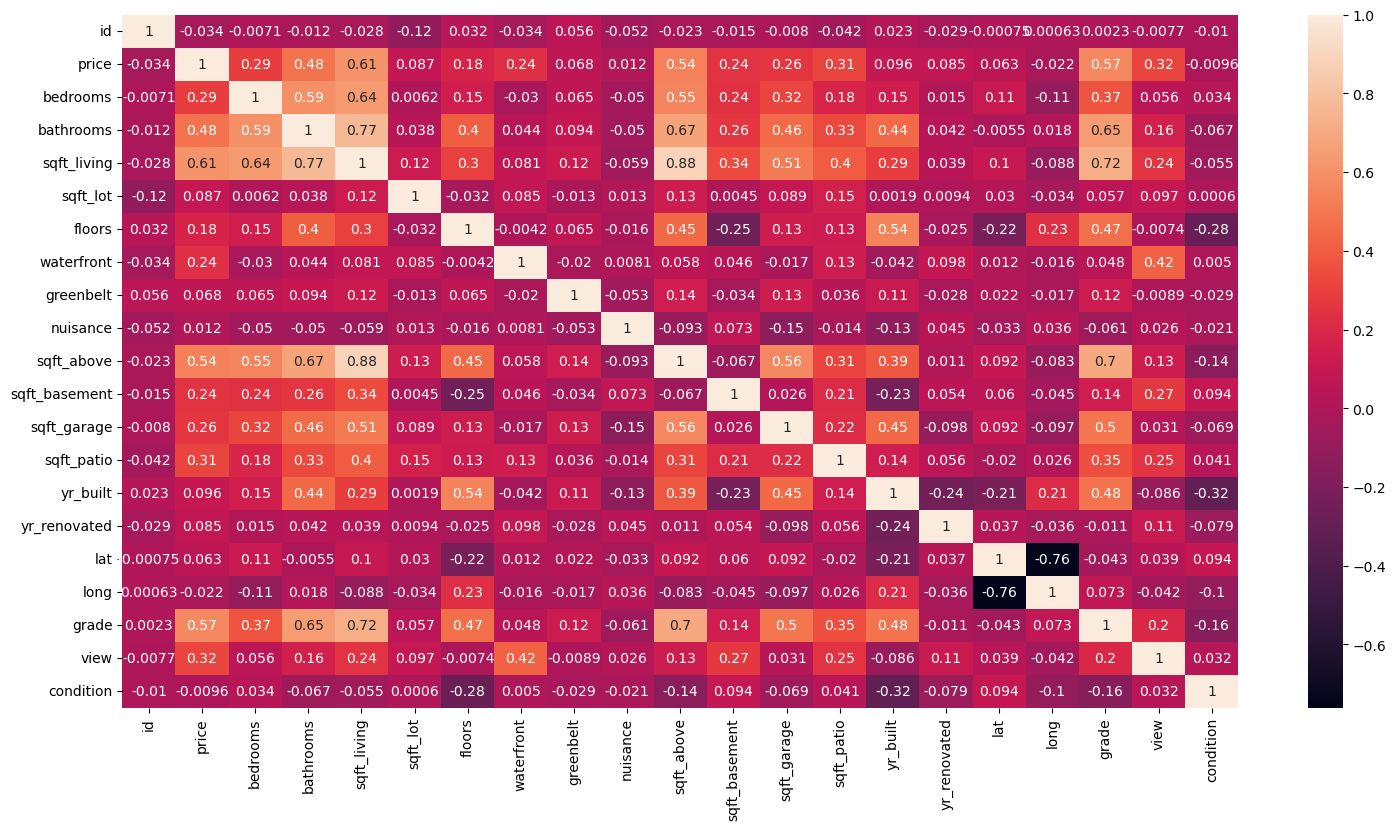

In [275]:
fig, ax = plt.subplots(figsize=(18,9))
sns.heatmap(df.corr(), annot = True)

In [276]:
y = df['price']
X = df['sqft_living']
X = sm.add_constant(X)
model = sm.OLS(y, X)
result_model = model.fit()
result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:51:33   Log-Likelihood:            -4.4845e+05
No. Observations:               30110   AIC:                         8.969e+05
Df Residuals:                   30108   BIC:                         8.969e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.554e+04   9798.938     -7.709      0.000   -9.47e+04   -5.63e+04
sqft_living   560.4787      4.212    133.083      0.000     552.224     568.733
==============================================================================
Omnibus:                    43384.896   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47191364.764
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.252   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [277]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,grade,view,condition
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0,0,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,6.0,0.0,3.0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0,0,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,6.0,2.0,2.0
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0,0,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,6.0,2.0,2.0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0,0,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,8.0,2.0,2.0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0,0,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,6.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,0,0,...,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,7.0,0.0,3.0
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,0,0,...,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,6.0,1.0,2.0
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,0,0,...,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,6.0,0.0,2.0
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,0,0,...,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,7.0,0.0,2.0


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          30110 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  int64  
 9   greenbelt      30110 non-null  int64  
 10  nuisance       30110 non-null  int64  
 11  heat_source    30110 non-null  object 
 12  sewer_system   30110 non-null  object 
 13  sqft_above     30110 non-null  int64  
 14  sqft_basement  30110 non-null  int64  
 15  sqft_garage    30110 non-null  int64  
 16  sqft_patio     30110 non-null  int64  
 17  yr_built       30110 non-null  int64  
 18  yr_ren

In [279]:
df['nuisance']

0        0
1        1
2        0
3        0
4        1
        ..
30150    0
30151    0
30152    1
30153    0
30154    0
Name: nuisance, Length: 30110, dtype: int64

In [280]:
X = df.drop(columns='price')
y = df['price']
cols_to_drop = X.select_dtypes(include=['object']).columns
X = X.drop(columns=cols_to_drop)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=33)

In [281]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns, index=X_train.index)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns, index=X_test.index)

X_train_scale

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,grade,view,condition
890,-0.141400,-0.424498,0.188734,-0.097105,-0.153467,0.796136,-0.130167,-0.163612,-0.459458,0.232547,0.042945,1.112466,0.290408,0.309010,-0.219987,-0.037752,-0.160985,0.296882,2.004617,-0.677444
16175,0.784355,-0.424498,0.188734,-0.281201,-0.137599,0.796136,-0.130167,-0.163612,-0.459458,0.029592,-0.822964,0.522155,-0.719494,0.526810,-0.219987,-0.084655,-0.121444,-0.571134,-0.343450,-0.677444
24599,-1.368927,0.595042,0.749536,-1.078949,-0.195581,-0.960565,-0.130167,-0.163612,2.176479,-0.849882,-0.320737,-0.137604,0.128824,0.215668,4.542111,0.135299,-0.171680,-0.571134,-0.343450,0.748147
14463,1.651019,-0.424498,-0.372067,-0.567572,-0.223773,-0.082215,-0.130167,-0.163612,-0.459458,-0.917534,0.493218,-0.450121,-0.073157,-1.526730,-0.219987,0.168200,-0.187545,-0.571134,2.004617,0.748147
16200,1.153755,-0.424498,0.188734,0.219949,-0.114061,0.796136,-0.130167,-0.163612,-0.459458,0.582082,-0.390010,1.355535,1.744667,0.340125,-0.219987,0.080115,-0.181823,1.164898,-0.343450,0.748147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27325,-1.261771,-0.424498,-0.372067,-0.577799,-0.075727,-0.960565,-0.130167,-0.163612,-0.459458,-0.297392,-0.822964,0.313810,-0.679098,-0.531074,-0.219987,0.126069,-0.152375,-0.571134,-0.343450,2.173739
578,-1.018280,-0.424498,-0.372067,-0.455069,-0.170171,-0.082215,-0.130167,-0.163612,-0.459458,-0.162088,-0.822964,-1.144604,-0.073157,-0.997788,-0.219987,0.044570,-0.162242,-1.439150,-0.343450,0.748147
5858,0.193584,-1.444039,-0.372067,-0.741440,-0.269504,2.552837,-0.130167,-0.163612,-0.459458,-0.477797,-0.182191,-0.693190,0.451992,1.273552,-0.219987,0.258340,-0.177698,0.296882,-0.343450,-0.677444
2443,-0.318881,-0.424498,0.188734,-0.639164,-0.269431,0.796136,-0.130167,-0.163612,2.176479,-0.759680,0.164172,-0.380673,-0.800286,0.931295,-0.219987,0.261049,-0.185062,-0.571134,-0.343450,-0.677444


In [282]:
# X_test_scale

In [283]:
# X_test_scale[X_test_scale['id'] == 784355]

In [284]:
# X_test_scale.loc[8129]

In [285]:
model_sk = LinearRegression()
model_sk.fit(X_train_scale, y_train)

LinearRegression()

In [286]:
train_preds = model_sk.predict(X_train_scale)

In [287]:
r2_score(y_train, train_preds)

0.47826742625545604

In [288]:
mean_absolute_error(y_train, train_preds)

351650.6559423083

In [289]:
np.sqrt(mean_squared_error(y_train, train_preds))

656400.5042147943

In [290]:
model_sk.score(X_train_scale, y_train)

0.47826742625545604

In [291]:
dict(zip(X_train.columns, model_sk.coef_))

{'id': -12334.326145599438,
 'bedrooms': -105187.07456157527,
 'bathrooms': 102912.72332187115,
 'sqft_living': 101146.45977116143,
 'sqft_lot': -12305.688377648738,
 'floors': -45670.08275392946,
 'waterfront': 125712.5960169679,
 'greenbelt': 7303.20334665576,
 'nuisance': 24514.627254820305,
 'sqft_above': 266457.2277678757,
 'sqft_basement': 92999.32131949301,
 'sqft_garage': -57065.869736952955,
 'sqft_patio': 18232.898228707778,
 'yr_built': -124695.24276224898,
 'yr_renovated': 4326.130808692286,
 'lat': 44852.09374803133,
 'long': 51120.423251148924,
 'grade': 295791.0225793257,
 'view': 60577.22035353558,
 'condition': 16935.458040142377}

In [292]:
model_sk.intercept_

1110829.7393446257

In [293]:
test_preds = model_sk.predict(X_test_scale)

r2_score(y_test, test_preds)

0.500167423100315

In [294]:
mean_absolute_error(y_test, test_preds)

354241.58397566853

In [295]:
mean_squared_error(y_test, test_preds)

385076315468.0037

In [296]:
np.sqrt(mean_squared_error(y_test, test_preds))

620545.1760089701

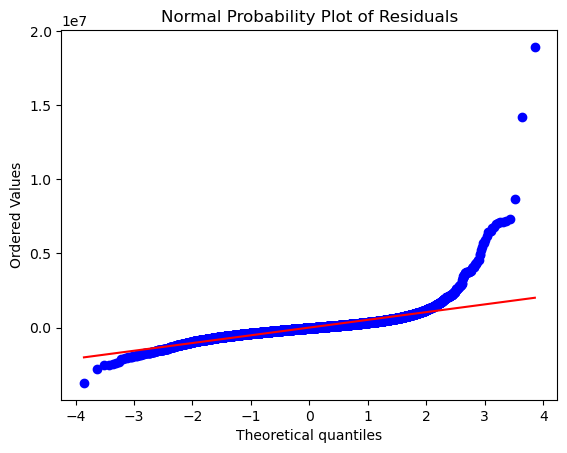

In [297]:
test_residuals = y_test - test_preds
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot of Residuals')
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          30110 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  int64  
 10  nuisance       30110 non-null  int64  
 11  heat_source    30110 non-null  object 
 12  sewer_system   30110 non-null  object 
 13  sqft_above     30110 non-null  int64  
 14  sqft_basement  30110 non-null  int64  
 15  sqft_garage    30110 non-null  int64  
 16  sqft_patio     30110 non-null  int64  
 17  yr_built       30110 non-null  int64  
 18  yr_ren

In [62]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,greenbelt,nuisance,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,grade,view,condition
count,3.011000e+04,3.011000e+04,30110.000000,30110.000000,30110.000000,3.011000e+04,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000
mean,4.539281e+09,1.108921e+06,3.415211,2.335653,2113.296745,1.664907e+04,1.543491,0.025639,0.174327,1810.363766,476.586118,330.469678,217.448854,1975.160844,90.795782,47.328471,-121.318844,6.653936,0.294487,2.472302
std,2.882221e+09,8.964895e+05,0.979769,0.888256,973.436623,5.993401e+04,0.567793,0.158059,0.379397,877.729415,579.790030,285.728094,245.305708,32.052466,416.204209,1.433331,5.724166,1.144541,0.853354,0.701966
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,1.000000,0.000000,0.000000
25%,2.071850e+09,6.491180e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,0.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405334,-122.326077,6.000000,0.000000,2.000000
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.476000e+03,1.500000,0.000000,0.000000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551437,-122.225815,7.000000,0.000000,2.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,0.000000,0.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669914,-122.116392,7.000000,0.000000,3.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,1.000000,1.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340,12.000000,4.000000,4.000000


In [63]:
# sq_mean = df['sqft_living'].mean()
# sq_std = df['sqft_living'].std()
# sq_max = sq_mean + sq_std
# sq_min = sq_mean - sq_std
# df = df.loc[(df['sqft_living'] > sq_min) & (df['sqft_living'] < sq_max)]
# df.info()

In [64]:
# p_mean = df['price'].mean()
# p_std = df['price'].std()
# p_max = p_mean + p_std
# p_min = p_mean - p_std
# df = df.loc[(df['price'] > p_min) & (df['price'] < p_max)]
# df.info()

In [65]:
# fig, axes = plt.subplots(6, 3, figsize=(20,30), sharey=True)
# for ax, column in zip(axes.flatten(), df.columns[2:]):
#     ax.scatter(df[column], df['price'], label=column, alpha=.1)
#     ax.set_title(f'Price vs {column}')
#     ax.set_xlabel(column)
#     ax.set_ylabel('Price')
# fig.tight_layout()
# for col in df.columns:
#     if col not in ['id', 'date', 'price', 'address']:
#         sns.lmplot(x=col, y='price', data=df, line_kws={'color': 'red'})
#         plt.title(f'{col.capitalize()} vs. Price')
#         plt.show()

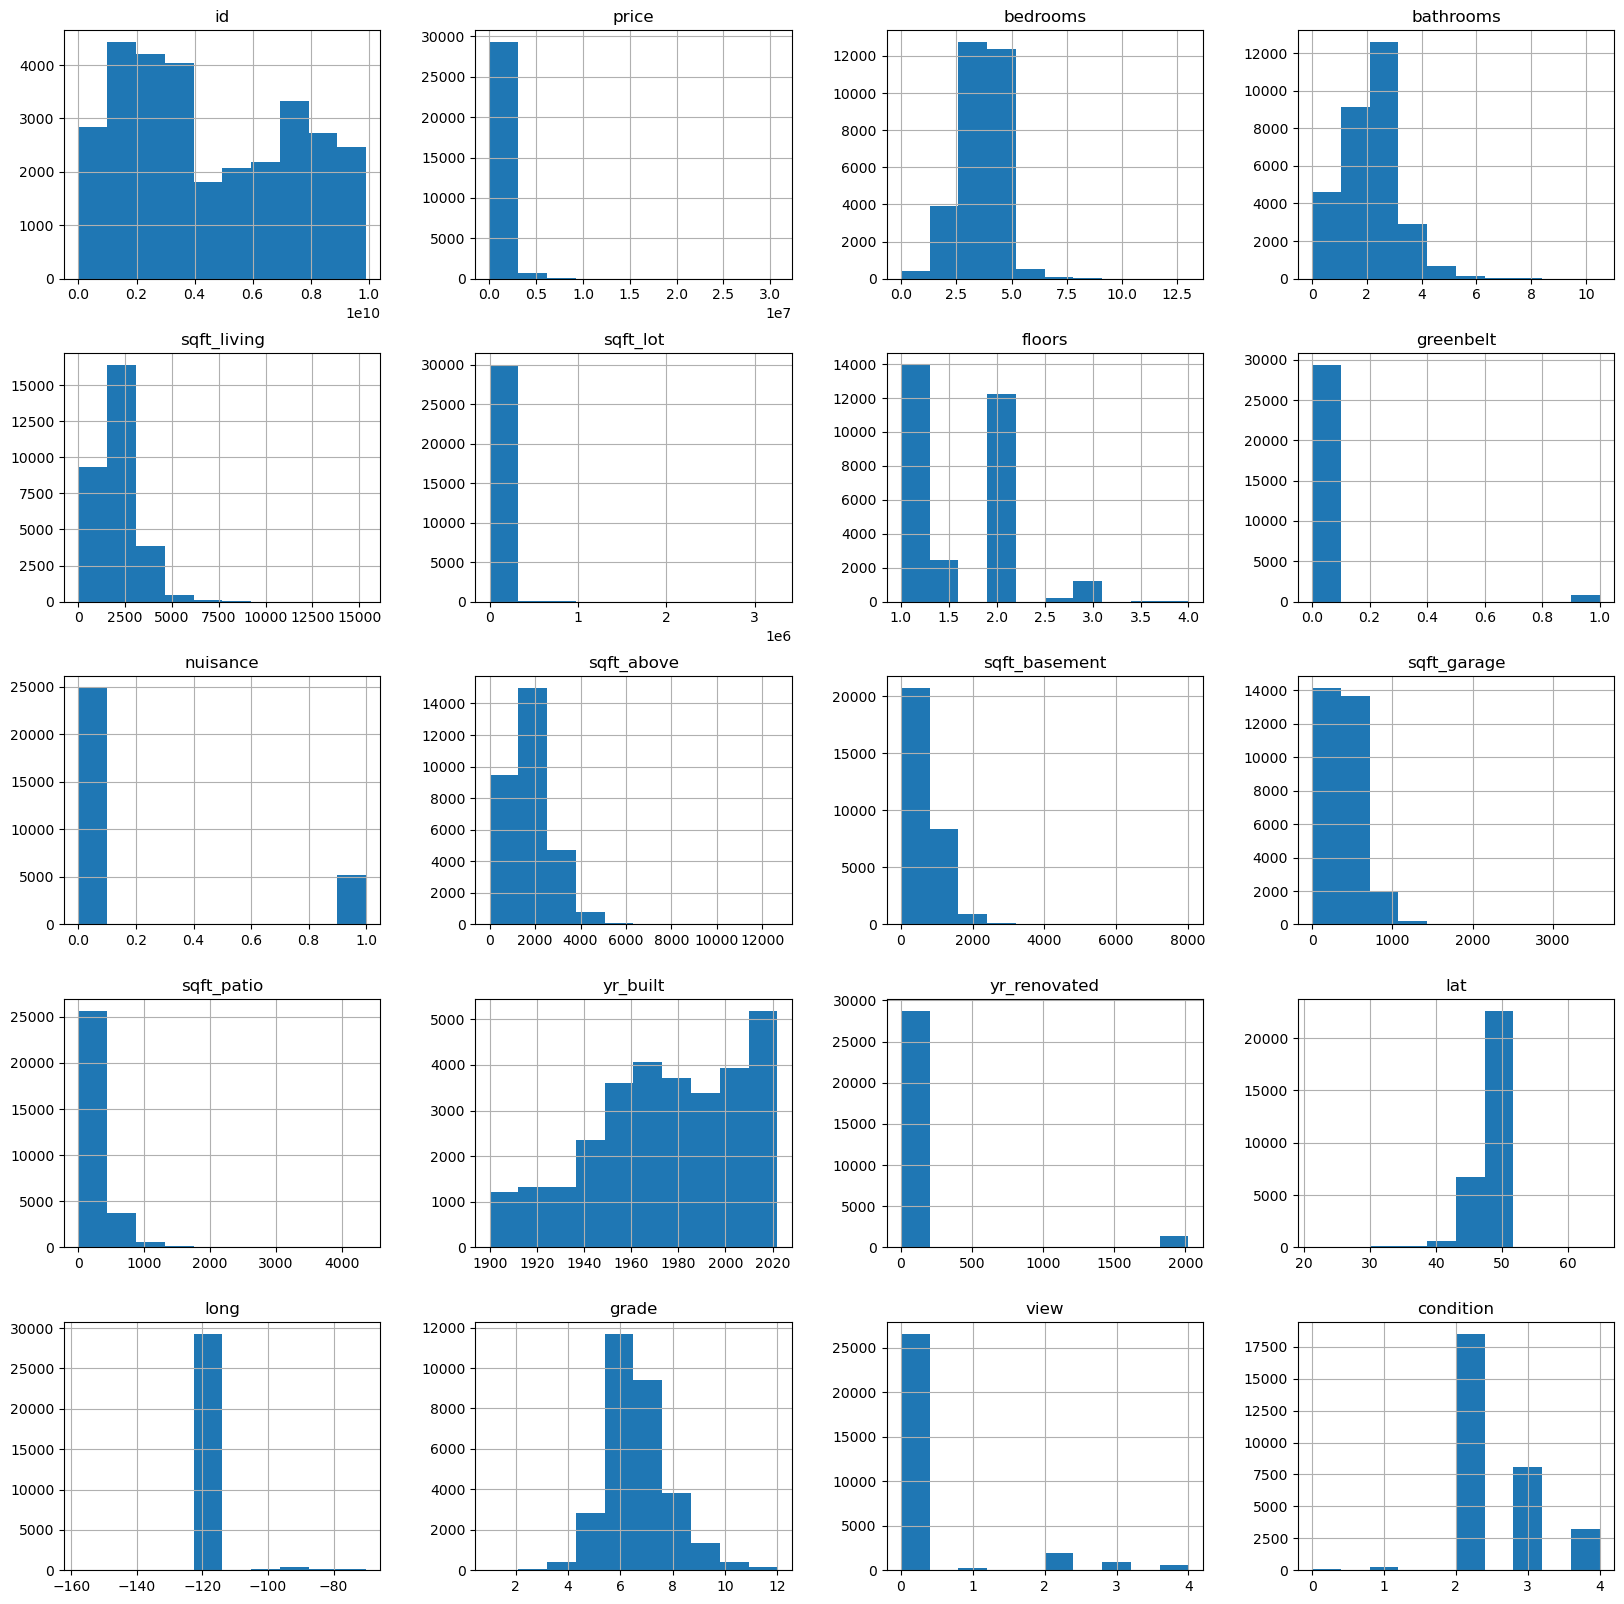

In [66]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
df.hist(ax = ax);

In [67]:
df['bedrooms'].describe()

count    30110.000000
mean         3.415211
std          0.979769
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         13.000000
Name: bedrooms, dtype: float64

In [68]:
df['bedrooms'].quantile(.999)

8.0

In [69]:
mean_bed = df.loc[(df['bedrooms'] < 8) | (df['bedrooms'] != 0), 'bedrooms'].mean()
mean_bed

3.4152108933909

In [70]:
df['bedrooms'] = df['bedrooms'].replace(range(9, 14), round(mean_bed)) & df['bedrooms'].replace(0, round(mean_bed))

In [71]:
df['bedrooms'].describe()

count    30110.000000
mean         3.410030
std          0.969147
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: bedrooms, dtype: float64

In [72]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,greenbelt,nuisance,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,grade,view,condition
count,3.011000e+04,3.011000e+04,30110.000000,30110.000000,30110.000000,3.011000e+04,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000
mean,4.539281e+09,1.108921e+06,3.410030,2.335653,2113.296745,1.664907e+04,1.543491,0.025639,0.174327,1810.363766,476.586118,330.469678,217.448854,1975.160844,90.795782,47.328471,-121.318844,6.653936,0.294487,2.472302
std,2.882221e+09,8.964895e+05,0.969147,0.888256,973.436623,5.993401e+04,0.567793,0.158059,0.379397,877.729415,579.790030,285.728094,245.305708,32.052466,416.204209,1.433331,5.724166,1.144541,0.853354,0.701966
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,1.000000,0.000000,0.000000
25%,2.071850e+09,6.491180e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,0.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405334,-122.326077,6.000000,0.000000,2.000000
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.476000e+03,1.500000,0.000000,0.000000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551437,-122.225815,7.000000,0.000000,2.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,0.000000,0.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669914,-122.116392,7.000000,0.000000,3.000000
max,9.904000e+09,3.075000e+07,8.000000,10.500000,15360.000000,3.253932e+06,4.000000,1.000000,1.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340,12.000000,4.000000,4.000000


In [73]:
round(df['bathrooms'].quantile(.999))

7

In [74]:
mean_bath = df.loc[(df['bathrooms'] < 7) | (df['bathrooms'] != 0), 'bathrooms'].mean()
mean_bath

2.3356526071072734

In [75]:
df['bathrooms'] = np.where((df['bathrooms'] == 0) | (df['bathrooms'] >= 7.0), round(mean_bath), df['bathrooms'])

In [76]:
df['bathrooms'].describe()

count    30110.000000
mean         2.331468
std          0.868558
min          0.500000
25%          2.000000
50%          2.500000
75%          3.000000
max          6.500000
Name: bathrooms, dtype: float64

In [77]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608586
grade            0.566508
sqft_above       0.538614
bathrooms        0.455861
view             0.316317
sqft_patio       0.313787
bedrooms         0.288812
sqft_garage      0.263655
sqft_basement    0.244938
floors           0.180555
yr_built         0.095728
sqft_lot         0.086562
yr_renovated     0.085039
greenbelt        0.067948
lat              0.063419
nuisance         0.012212
condition       -0.009563
long            -0.022271
id              -0.034035
Name: price, dtype: float64

<AxesSubplot:>

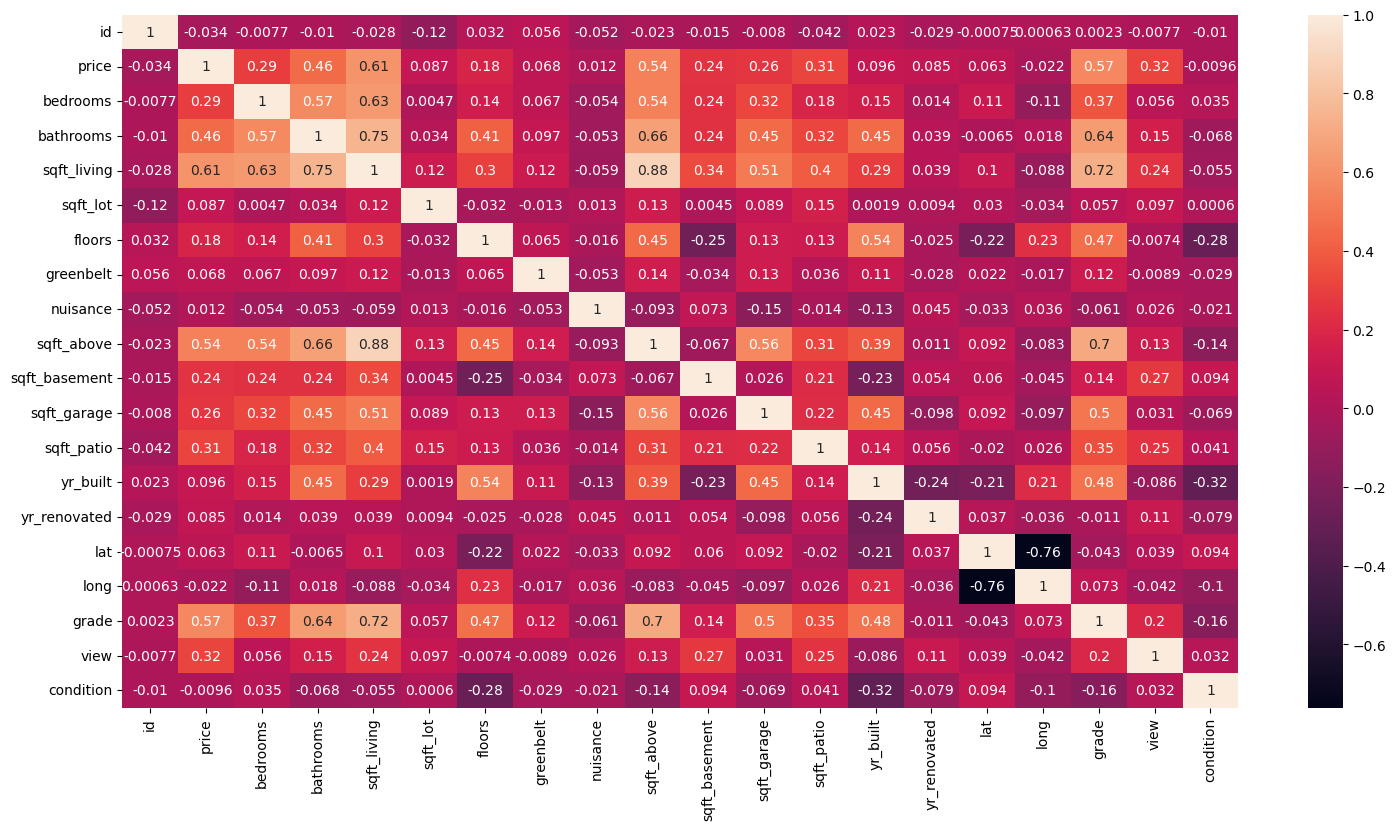

In [78]:
fig, ax = plt.subplots(figsize=(18,9))
sns.heatmap(df.corr(), annot = True)

In [79]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608586
grade            0.566508
sqft_above       0.538614
bathrooms        0.455861
view             0.316317
sqft_patio       0.313787
bedrooms         0.288812
sqft_garage      0.263655
sqft_basement    0.244938
floors           0.180555
yr_built         0.095728
sqft_lot         0.086562
yr_renovated     0.085039
greenbelt        0.067948
lat              0.063419
nuisance         0.012212
condition       -0.009563
long            -0.022271
id              -0.034035
Name: price, dtype: float64

In [80]:
df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [81]:
import re

df['zipcode'] = df['address'].str.extract(r'(\d{5})').astype(int)
df['zipcode']

0        98055
1        11231
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    17127
30154    18615
Name: zipcode, Length: 30110, dtype: int32

In [82]:
len(df['zipcode'].unique())

8504

In [83]:
categorical = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode', 'greenbelt', 'nuisance']

for column in df[categorical]:
    df[categorical] = df[categorical].astype('category') 

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             30110 non-null  int64   
 1   date           30110 non-null  object  
 2   price          30110 non-null  float64 
 3   bedrooms       30110 non-null  category
 4   bathrooms      30110 non-null  category
 5   sqft_living    30110 non-null  int64   
 6   sqft_lot       30110 non-null  int64   
 7   floors         30110 non-null  category
 8   waterfront     30110 non-null  category
 9   greenbelt      30110 non-null  category
 10  nuisance       30110 non-null  category
 11  heat_source    30110 non-null  object  
 12  sewer_system   30110 non-null  object  
 13  sqft_above     30110 non-null  int64   
 14  sqft_basement  30110 non-null  int64   
 15  sqft_garage    30110 non-null  int64   
 16  sqft_patio     30110 non-null  int64   
 17  yr_built       30110 non-null  

In [85]:
df.grade.dtype

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
                  12.0],
, ordered=False)

In [86]:
df['grade'].unique()

[6.0, 8.0, 7.0, 5.0, 9.0, ..., 11.0, 3.0, 12.0, 2.0, 1.0]
Length: 12
Categories (12, float64): [1.0, 2.0, 3.0, 4.0, ..., 9.0, 10.0, 11.0, 12.0]

In [87]:
# df['grade'] = df['grade'].cat.reorder_categories(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])
# df['grade']

In [88]:
# df['grade'] = df['grade'].str.split().str[0].str.join(' ')

In [89]:
#df['grade'] = df['grade'].astype(int)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             30110 non-null  int64   
 1   date           30110 non-null  object  
 2   price          30110 non-null  float64 
 3   bedrooms       30110 non-null  category
 4   bathrooms      30110 non-null  category
 5   sqft_living    30110 non-null  int64   
 6   sqft_lot       30110 non-null  int64   
 7   floors         30110 non-null  category
 8   waterfront     30110 non-null  category
 9   greenbelt      30110 non-null  category
 10  nuisance       30110 non-null  category
 11  heat_source    30110 non-null  object  
 12  sewer_system   30110 non-null  object  
 13  sqft_above     30110 non-null  int64   
 14  sqft_basement  30110 non-null  int64   
 15  sqft_garage    30110 non-null  int64   
 16  sqft_patio     30110 non-null  int64   
 17  yr_built       30110 non-null  

In [91]:
for_heat_map = df.drop(['id', 'price', 'lat', 'long'], axis=1)
for_heat_map

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,heat_source,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,grade,view,condition,zipcode
0,5/24/2022,4,1.0,1180,7140,1.0,0 0\n1 0\n2 0\n3 0...,0,0,Gas,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",6.0,0.0,3.0,98055
1,12/13/2021,5,2.5,2770,6703,1.0,0 0\n1 0\n2 0\n3 0...,0,1,Oil,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",6.0,2.0,2.0,11231
2,9/29/2021,6,2.0,2880,6156,1.0,0 0\n1 0\n2 0\n3 0...,0,0,Gas,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",6.0,2.0,2.0,98178
3,12/14/2021,3,3.0,2160,1400,2.0,0 0\n1 0\n2 0\n3 0...,0,0,Gas,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",8.0,2.0,2.0,98118
4,8/24/2021,2,2.0,1120,758,2.0,0 0\n1 0\n2 0\n3 0...,0,1,Electricity,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",6.0,0.0,2.0,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,5,2.0,1910,4000,1.5,0 0\n1 0\n2 0\n3 0...,0,0,Oil,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",7.0,0.0,3.0,98103
30151,6/16/2021,3,2.0,2020,5800,2.0,0 0\n1 0\n2 0\n3 0...,0,0,Gas,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",6.0,1.0,2.0,98116
30152,5/27/2022,3,2.0,1620,3600,1.0,0 0\n1 0\n2 0\n3 0...,0,1,Gas,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",6.0,0.0,2.0,98122
30153,2/24/2022,3,2.5,2570,2889,2.0,0 0\n1 0\n2 0\n3 0...,0,0,Gas,...,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",7.0,0.0,2.0,17127


<AxesSubplot:>

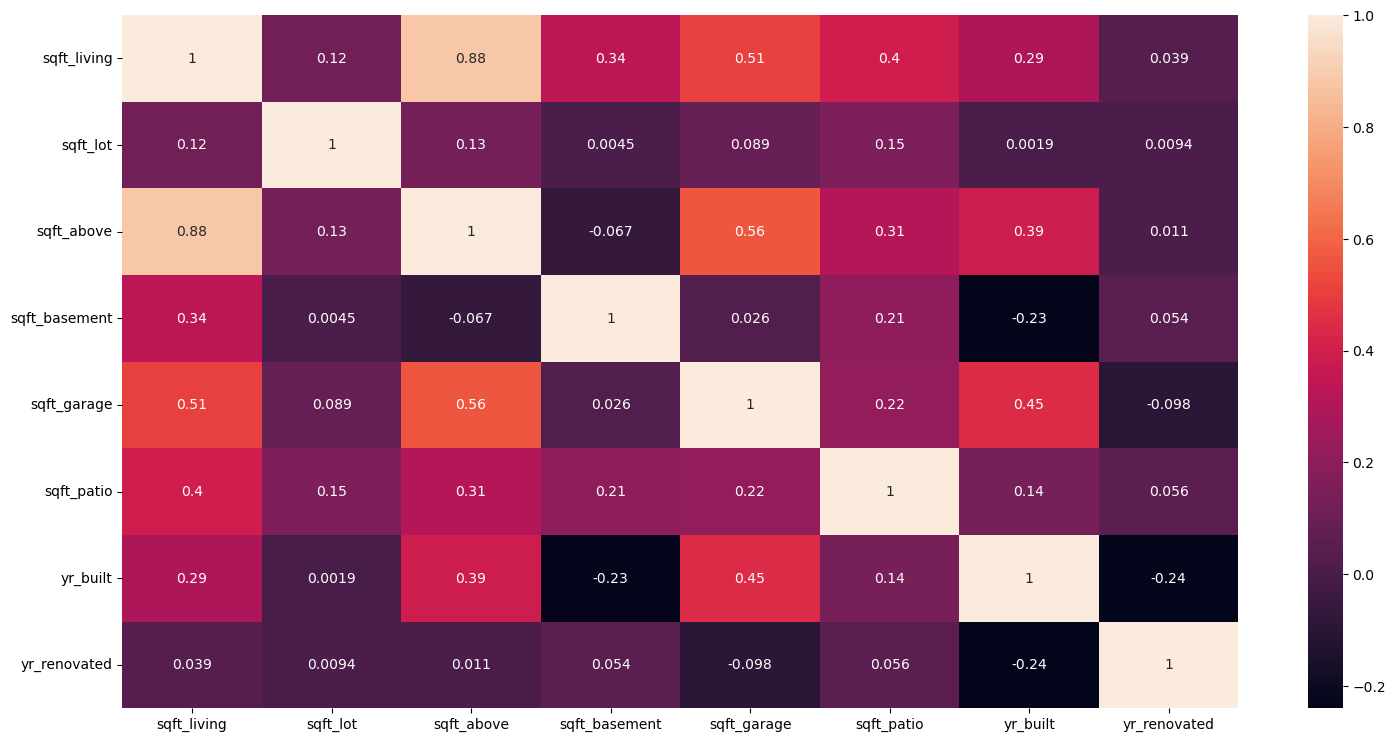

In [92]:
fig, ax = plt.subplots(figsize=(18,9))
sns.heatmap(for_heat_map.corr(), annot = True)

In [93]:
df['condition']

0        3.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
30150    3.0
30151    2.0
30152    2.0
30153    2.0
30154    2.0
Name: condition, Length: 30110, dtype: category
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             30110 non-null  int64   
 1   date           30110 non-null  object  
 2   price          30110 non-null  float64 
 3   bedrooms       30110 non-null  category
 4   bathrooms      30110 non-null  category
 5   sqft_living    30110 non-null  int64   
 6   sqft_lot       30110 non-null  int64   
 7   floors         30110 non-null  category
 8   waterfront     30110 non-null  category
 9   greenbelt      30110 non-null  category
 10  nuisance       30110 non-null  category
 11  heat_source    30110 non-null  object  
 12  sewer_system   30110 non-null  object  
 13  sqft_above     30110 non-null  int64   
 14  sqft_basement  30110 non-null  int64   
 15  sqft_garage    30110 non-null  int64   
 16  sqft_patio     30110 non-null  int64   
 17  yr_built       30110 non-null  

In [95]:
X = df.drop(columns=['price', 'id', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition'])
y = df['price']
cols_to_drop = X.select_dtypes(include=['object']).columns
X = X.drop(columns=cols_to_drop)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=33)

In [96]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns, index=X_train.index)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns, index=X_test.index)

X_train_scale

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,grade,zipcode
890,-0.424187,0.197749,-0.097105,-0.153467,0.796136,0.232547,0.042945,1.112466,0.290408,0.309010,-0.219987,-0.037752,-0.160985,0.296882,0.882895
16175,-0.424187,0.197749,-0.281201,-0.137599,0.796136,0.029592,-0.822964,0.522155,-0.719494,0.526810,-0.219987,-0.084655,-0.121444,-0.571134,0.881091
24599,0.609447,0.772020,-1.078949,-0.195581,-0.960565,-0.849882,-0.320737,-0.137604,0.128824,0.215668,4.542111,0.135299,-0.171680,-0.571134,0.883565
14463,-0.424187,-0.376522,-0.567572,-0.223773,-0.082215,-0.917534,0.493218,-0.450121,-0.073157,-1.526730,-0.219987,0.168200,-0.187545,-0.571134,0.883771
16200,-0.424187,0.197749,0.219949,-0.114061,0.796136,0.582082,-0.390010,1.355535,1.744667,0.340125,-0.219987,0.080115,-0.181823,1.164898,0.884802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27325,-0.424187,-0.376522,-0.577799,-0.075727,-0.960565,-0.297392,-0.822964,0.313810,-0.679098,-0.531074,-0.219987,0.126069,-0.152375,-0.571134,0.881967
578,-0.424187,-0.376522,-0.455069,-0.170171,-0.082215,-0.162088,-0.822964,-1.144604,-0.073157,-0.997788,-0.219987,0.044570,-0.162242,-1.439150,0.881298
5858,-1.457821,-0.376522,-0.741440,-0.269504,2.552837,-0.477797,-0.182191,-0.693190,0.451992,1.273552,-0.219987,0.258340,-0.177698,0.296882,0.883488
2443,-0.424187,0.197749,-0.639164,-0.269431,0.796136,-0.759680,0.164172,-0.380673,-0.800286,0.931295,-0.219987,0.261049,-0.185062,-0.571134,-1.383946


In [97]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
model_pred = model.predict(X_train)
r2_score(y_train, model_pred)

0.45277093977447025

In [98]:
mean_absolute_error(y_train, model_pred)

352572.7952178018

In [99]:
np.sqrt(mean_squared_error(y_train, model_pred))

672247.9801270372

In [100]:
lm.coef_

array([-1.09727172e+05,  6.58047538e+04,  2.08017891e+02,  1.44573386e-01,
       -1.07893537e+05,  2.45862729e+02,  1.24827932e+02, -1.60314213e+02,
        1.73237318e+02, -3.80154797e+03,  4.09622542e+01,  3.14857708e+04,
        1.13139900e+04,  2.58040558e+05,  2.34547083e+00])

In [101]:
#df['sum_sqft'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_above'] + df['sqft_basement'] + df['sqft_garage'] + df['sqft_patio']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,grade,view,condition,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0 0\n1 0\n2 0\n3 0...,0,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,6.0,0.0,3.0,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0 0\n1 0\n2 0\n3 0...,0,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,6.0,2.0,2.0,11231
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0 0\n1 0\n2 0\n3 0...,0,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,6.0,2.0,2.0,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0 0\n1 0\n2 0\n3 0...,0,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,8.0,2.0,2.0,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0 0\n1 0\n2 0\n3 0...,0,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,6.0,0.0,2.0,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,0 0\n1 0\n2 0\n3 0...,0,...,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,7.0,0.0,3.0,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,0 0\n1 0\n2 0\n3 0...,0,...,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,6.0,1.0,2.0,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,0 0\n1 0\n2 0\n3 0...,0,...,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,6.0,0.0,2.0,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,0 0\n1 0\n2 0\n3 0...,0,...,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,7.0,0.0,2.0,17127


In [102]:
# p_mean = df['price'].mean()
# p_std = df['price'].std()
# p_max = p_mean + p_std
# p_min = p_mean - p_std
# df = df.loc[(df['price'] > p_min) & (df['price'] < p_max)]
# df.info()

In [103]:
#df.drop(columns = ['sqft_above', 'sqft_patio', 'sqft_garage', 'sqft_basement', 'sum_sqft', 'sqft_lot'], axis=1, inplace=True)

In [104]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608586
sqft_above       0.538614
sqft_patio       0.313787
sqft_garage      0.263655
sqft_basement    0.244938
yr_built         0.095728
sqft_lot         0.086562
yr_renovated     0.085039
lat              0.063419
long            -0.022271
id              -0.034035
Name: price, dtype: float64

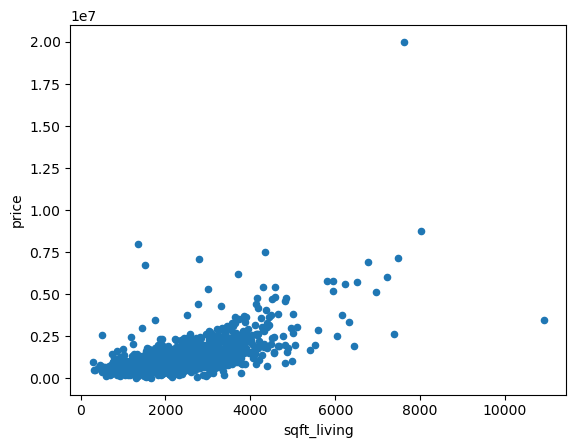

In [105]:
df.sample(2000, random_state=33).plot.scatter(x='sqft_living', y="price");

In [106]:
# p_mean = df['price'].mean()
# p_std = df['price'].std()
# p_max = p_mean + p_std
# p_min = p_mean - p_std
# df = df.loc[(df['price'] > p_min) & (df['price'] < p_max)]
# df.info()

In [107]:
# sq_mean = df['sqft_living'].mean()
# sq_std = df['sqft_living'].std()
# sq_max = sq_mean + sq_std
# sq_min = sq_mean - sq_std
# df = df.loc[(df['sqft_living'] > sq_min) & (df['sqft_living'] < sq_max)]
# df.info()

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             30110 non-null  int64   
 1   date           30110 non-null  object  
 2   price          30110 non-null  float64 
 3   bedrooms       30110 non-null  category
 4   bathrooms      30110 non-null  category
 5   sqft_living    30110 non-null  int64   
 6   sqft_lot       30110 non-null  int64   
 7   floors         30110 non-null  category
 8   waterfront     30110 non-null  category
 9   greenbelt      30110 non-null  category
 10  nuisance       30110 non-null  category
 11  heat_source    30110 non-null  object  
 12  sewer_system   30110 non-null  object  
 13  sqft_above     30110 non-null  int64   
 14  sqft_basement  30110 non-null  int64   
 15  sqft_garage    30110 non-null  int64   
 16  sqft_patio     30110 non-null  int64   
 17  yr_built       30110 non-null  

In [109]:
df['view'].unique()

[0.0, 2.0, 4.0, 1.0, 3.0]
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]

In [110]:
df['condition'].unique()

[3.0, 2.0, 4.0, 1.0, 0.0]
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]

In [111]:
df['grade'].unique()

[6.0, 8.0, 7.0, 5.0, 9.0, ..., 11.0, 3.0, 12.0, 2.0, 1.0]
Length: 12
Categories (12, float64): [1.0, 2.0, 3.0, 4.0, ..., 9.0, 10.0, 11.0, 12.0]

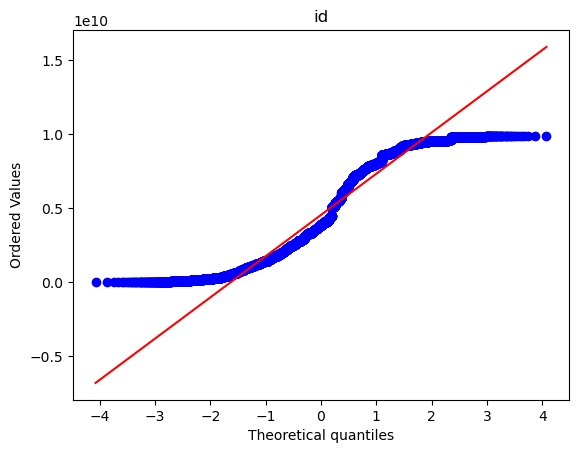

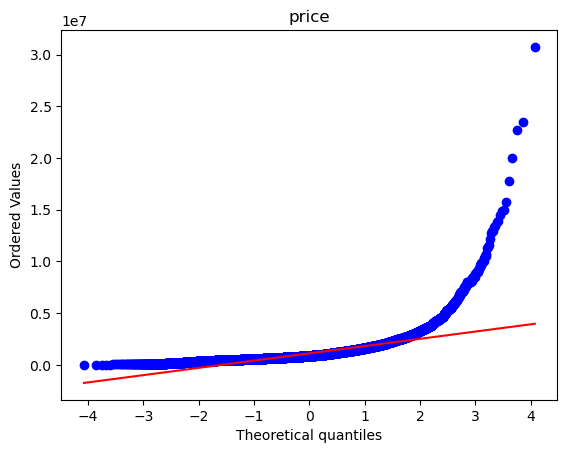

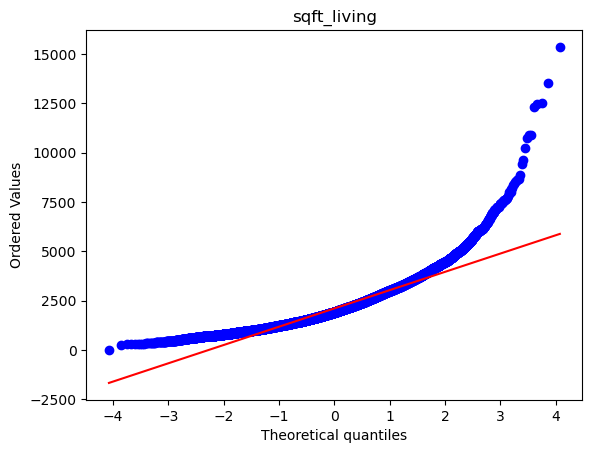

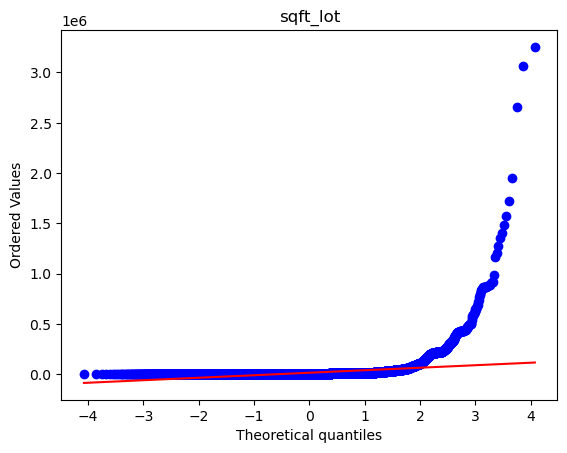

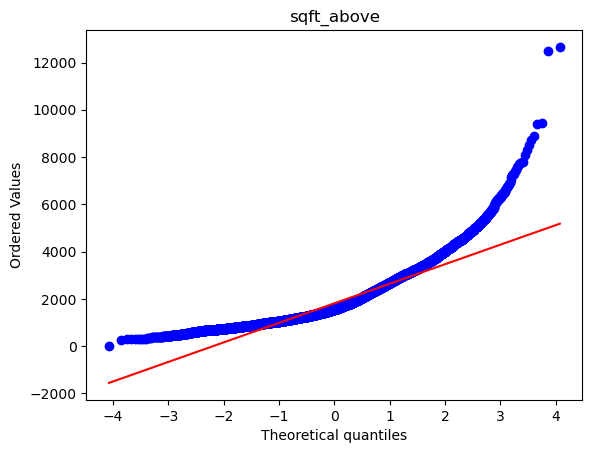

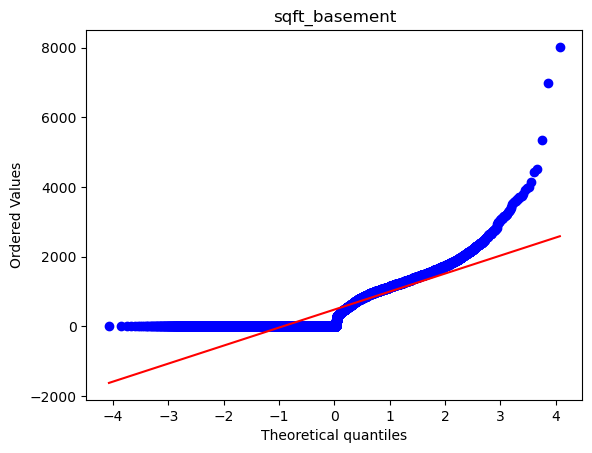

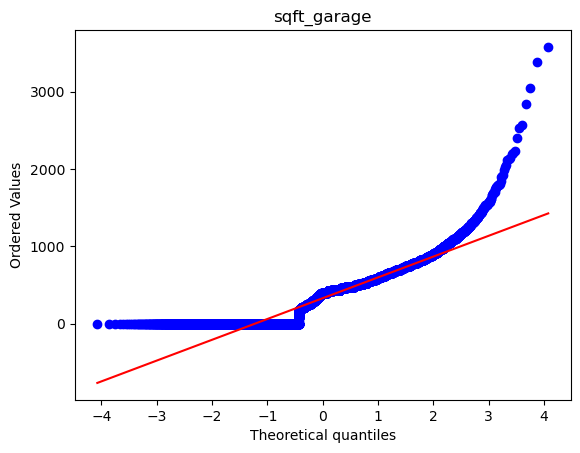

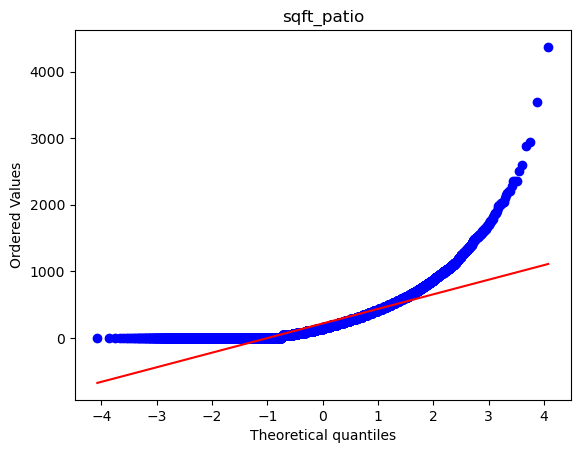

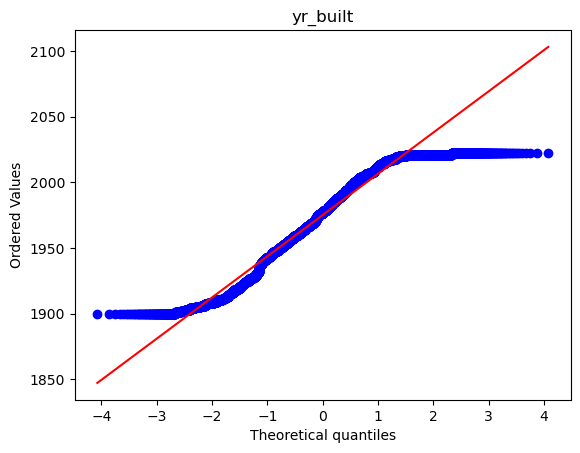

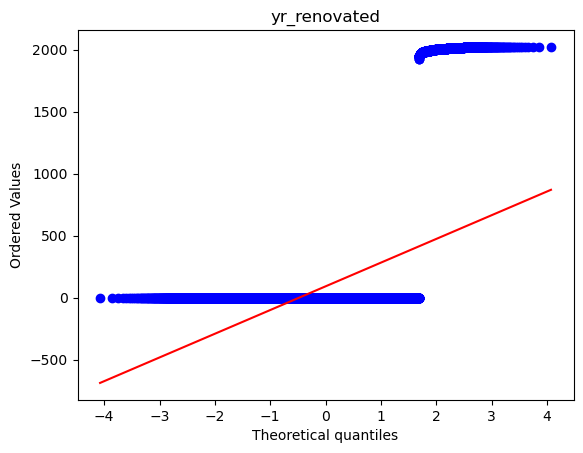

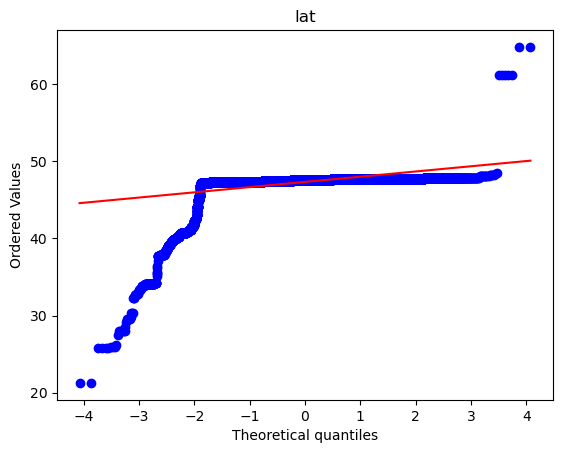

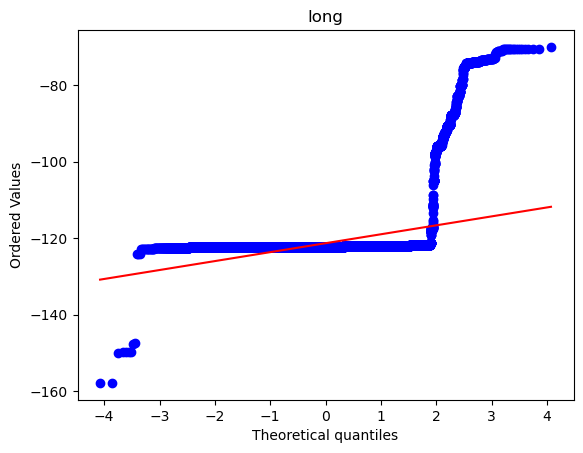

In [112]:
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
# create a normal probability plot for each numerical column
for column in numerical_columns:
    fig, ax = plt.subplots()
    stats.probplot(df[column], plot=ax)
    ax.set_title(column)
    plt.show()

In [113]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,grade,view,condition,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0 0\n1 0\n2 0\n3 0...,0,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,6.0,0.0,3.0,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0 0\n1 0\n2 0\n3 0...,0,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,6.0,2.0,2.0,11231
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0 0\n1 0\n2 0\n3 0...,0,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,6.0,2.0,2.0,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0 0\n1 0\n2 0\n3 0...,0,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,8.0,2.0,2.0,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0 0\n1 0\n2 0\n3 0...,0,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,6.0,0.0,2.0,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,0 0\n1 0\n2 0\n3 0...,0,...,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,7.0,0.0,3.0,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,0 0\n1 0\n2 0\n3 0...,0,...,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,6.0,1.0,2.0,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,0 0\n1 0\n2 0\n3 0...,0,...,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,6.0,0.0,2.0,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,0 0\n1 0\n2 0\n3 0...,0,...,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,7.0,0.0,2.0,17127


In [114]:
data_f

,grade,view,condition
0,6.0,0.0,3.0
1,6.0,2.0,2.0
2,6.0,2.0,2.0
3,8.0,2.0,2.0
4,6.0,0.0,2.0
...,...,...,...
30150,7.0,0.0,3.0
30151,6.0,1.0,2.0
30152,6.0,0.0,2.0
30153,7.0,0.0,2.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             30110 non-null  int64   
 1   date           30110 non-null  object  
 2   price          30110 non-null  float64 
 3   bedrooms       30110 non-null  category
 4   bathrooms      30110 non-null  category
 5   sqft_living    30110 non-null  int64   
 6   sqft_lot       30110 non-null  int64   
 7   floors         30110 non-null  category
 8   waterfront     30110 non-null  category
 9   greenbelt      30110 non-null  category
 10  nuisance       30110 non-null  category
 11  heat_source    30110 non-null  object  
 12  sewer_system   30110 non-null  object  
 13  sqft_above     30110 non-null  int64   
 14  sqft_basement  30110 non-null  int64   
 15  sqft_garage    30110 non-null  int64   
 16  sqft_patio     30110 non-null  int64   
 17  yr_built       30110 non-null  

In [116]:
cat_feat = ['bedrooms', 'floors', 'grade', 'condition', 'view']
onehot_enc = OneHotEncoder(drop = 'first', sparse = False)
X_cat_trans = onehot_enc.fit_transform(df[cat_feat])

In [117]:
cols = onehot_enc.get_feature_names_out()
cols

array(['bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'floors_3.5', 'floors_4.0', 'grade_2.0', 'grade_3.0', 'grade_4.0',
       'grade_5.0', 'grade_6.0', 'grade_7.0', 'grade_8.0', 'grade_9.0',
       'grade_10.0', 'grade_11.0', 'grade_12.0', 'condition_1.0',
       'condition_2.0', 'condition_3.0', 'condition_4.0', 'view_1.0',
       'view_2.0', 'view_3.0', 'view_4.0'], dtype=object)

In [118]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
grade            0
view             0
condition        0
zipcode          0
dtype: int64

In [119]:
X_nom= pd.DataFrame(X_cat_trans,columns = cols)
X_nom

,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,floors_1.5,floors_2.0,...,grade_11.0,grade_12.0,condition_1.0,condition_2.0,condition_3.0,condition_4.0,view_1.0,view_2.0,view_3.0,view_4.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30106,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
30107,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30108,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
df = df.reset_index(drop=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,grade,view,condition,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0 0\n1 0\n2 0\n3 0...,0,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,6.0,0.0,3.0,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0 0\n1 0\n2 0\n3 0...,0,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,6.0,2.0,2.0,11231
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0 0\n1 0\n2 0\n3 0...,0,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,6.0,2.0,2.0,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0 0\n1 0\n2 0\n3 0...,0,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,8.0,2.0,2.0,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0 0\n1 0\n2 0\n3 0...,0,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,6.0,0.0,2.0,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,0 0\n1 0\n2 0\n3 0...,0,...,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,7.0,0.0,3.0,98103
30106,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,0 0\n1 0\n2 0\n3 0...,0,...,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,6.0,1.0,2.0,98116
30107,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,0 0\n1 0\n2 0\n3 0...,0,...,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,6.0,0.0,2.0,98122
30108,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,0 0\n1 0\n2 0\n3 0...,0,...,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,7.0,0.0,2.0,17127


In [121]:
X_nom.isna().sum()

bedrooms_1       0
bedrooms_2       0
bedrooms_3       0
bedrooms_4       0
bedrooms_5       0
bedrooms_6       0
bedrooms_7       0
bedrooms_8       0
floors_1.5       0
floors_2.0       0
floors_2.5       0
floors_3.0       0
floors_3.5       0
floors_4.0       0
grade_2.0        0
grade_3.0        0
grade_4.0        0
grade_5.0        0
grade_6.0        0
grade_7.0        0
grade_8.0        0
grade_9.0        0
grade_10.0       0
grade_11.0       0
grade_12.0       0
condition_1.0    0
condition_2.0    0
condition_3.0    0
condition_4.0    0
view_1.0         0
view_2.0         0
view_3.0         0
view_4.0         0
dtype: int64

In [122]:
#df = df.drop(columns = ['bedrooms', 'floors'])
df_ = pd.concat([df,X_nom],axis = 1)
df_

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,grade_11.0,grade_12.0,condition_1.0,condition_2.0,condition_3.0,condition_4.0,view_1.0,view_2.0,view_3.0,view_4.0
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0 0\n1 0\n2 0\n3 0...,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0 0\n1 0\n2 0\n3 0...,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0 0\n1 0\n2 0\n3 0...,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0 0\n1 0\n2 0\n3 0...,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0 0\n1 0\n2 0\n3 0...,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,0 0\n1 0\n2 0\n3 0...,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30106,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,0 0\n1 0\n2 0\n3 0...,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
30107,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,0 0\n1 0\n2 0\n3 0...,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30108,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,0 0\n1 0\n2 0\n3 0...,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
df_ = df_.drop(columns = ['bedrooms', 'floors', 'view', 'grade', 'condition'])

In [124]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30110 entries, 0 to 30109
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             30110 non-null  int64   
 1   date           30110 non-null  object  
 2   price          30110 non-null  float64 
 3   bathrooms      30110 non-null  category
 4   sqft_living    30110 non-null  int64   
 5   sqft_lot       30110 non-null  int64   
 6   waterfront     30110 non-null  category
 7   greenbelt      30110 non-null  category
 8   nuisance       30110 non-null  category
 9   heat_source    30110 non-null  object  
 10  sewer_system   30110 non-null  object  
 11  sqft_above     30110 non-null  int64   
 12  sqft_basement  30110 non-null  int64   
 13  sqft_garage    30110 non-null  int64   
 14  sqft_patio     30110 non-null  int64   
 15  yr_built       30110 non-null  int64   
 16  yr_renovated   30110 non-null  int64   
 17  address        30110 non-null  

In [125]:
df_ = df_.drop(columns = ['waterfront', 'date', 'lat', 'long'])

In [126]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30110 entries, 0 to 30109
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             30110 non-null  int64   
 1   price          30110 non-null  float64 
 2   bathrooms      30110 non-null  category
 3   sqft_living    30110 non-null  int64   
 4   sqft_lot       30110 non-null  int64   
 5   greenbelt      30110 non-null  category
 6   nuisance       30110 non-null  category
 7   heat_source    30110 non-null  object  
 8   sewer_system   30110 non-null  object  
 9   sqft_above     30110 non-null  int64   
 10  sqft_basement  30110 non-null  int64   
 11  sqft_garage    30110 non-null  int64   
 12  sqft_patio     30110 non-null  int64   
 13  yr_built       30110 non-null  int64   
 14  yr_renovated   30110 non-null  int64   
 15  address        30110 non-null  object  
 16  zipcode        30110 non-null  category
 17  bedrooms_1     30110 non-null  

In [127]:
df_.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608586
sqft_above       0.538614
grade_10.0       0.317343
sqft_patio       0.313787
grade_9.0        0.299904
view_4.0         0.288686
grade_11.0       0.283109
sqft_garage      0.263655
sqft_basement    0.244938
grade_8.0        0.202348
bedrooms_5       0.201346
floors_2.0       0.199623
grade_12.0       0.198173
bedrooms_4       0.122797
view_3.0         0.121571
bedrooms_6       0.107047
view_2.0         0.100389
yr_built         0.095728
sqft_lot         0.086562
yr_renovated     0.085039
floors_2.5       0.083023
view_1.0         0.060592
bedrooms_7       0.045749
condition_2.0    0.036032
bedrooms_8       0.019695
condition_4.0    0.008540
floors_3.5      -0.002741
floors_4.0      -0.004337
floors_3.0      -0.006786
grade_2.0       -0.010733
grade_7.0       -0.018833
grade_3.0       -0.020703
floors_1.5      -0.021677
bedrooms_1      -0.021989
condition_1.0   -0.030629
id              -0.034035
condition_3.0   -0.037470
grade_4.0   

In [128]:
X = df_.drop(columns=['price', 'id'])
y = df_['price']
y = np.log(y)
cols_to_drop = X.select_dtypes(include=['object']).columns
X = X.drop(columns=cols_to_drop)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=33)

In [129]:
len(X_train)

18066

In [130]:
len(X_test)

12044

In [131]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
model_pred = model.predict(X_train)
r2_score(y_train, model_pred)

0.5111964084487014

In [132]:
mo_pred = model.predict(X_test)
r2_score(y_test, mo_pred)

0.5005651861989117

In [147]:
def remove_outliers(df, cols):
    """
    Remove outliers from a DataFrame for specified columns using the interquartile range (IQR) method.

    Args:
        df (pandas.DataFrame): DataFrame to remove outliers from.
        cols (list): List of column names to remove outliers from.

    Returns:
        pandas.DataFrame: DataFrame with outliers removed for specified columns.
    """
    df_out = df.copy()
    for col in cols:
        q1 = df_out[col].quantile(0.25)
        q3 = df_out[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

In [148]:
cols_to_filter = ['sqft_living', 'sqft_patio', 'sqft_garage', 'sqft_basement', 'sqft_lot']
filtered_df = remove_outliers(df, cols_to_filter)

print('Original shape:', df.shape)
print('Filtered shape:', filtered_df.shape)

Original shape: (30110, 26)
Filtered shape: (25268, 26)


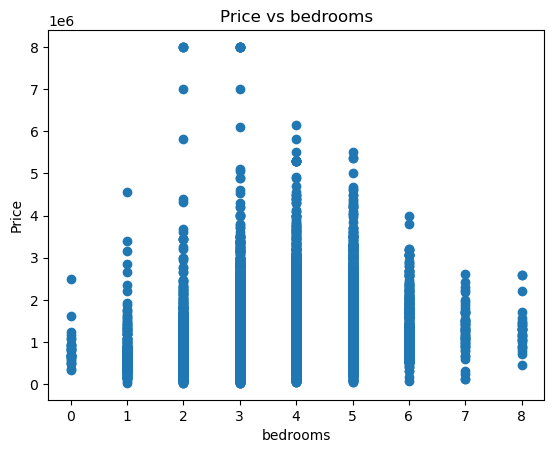

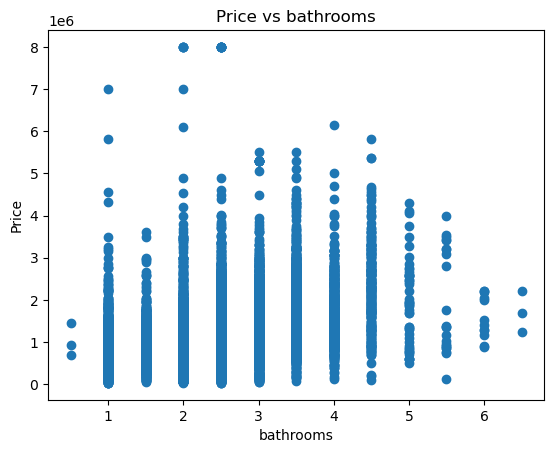

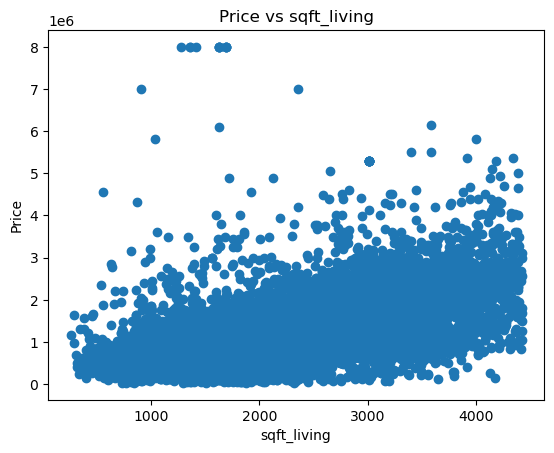

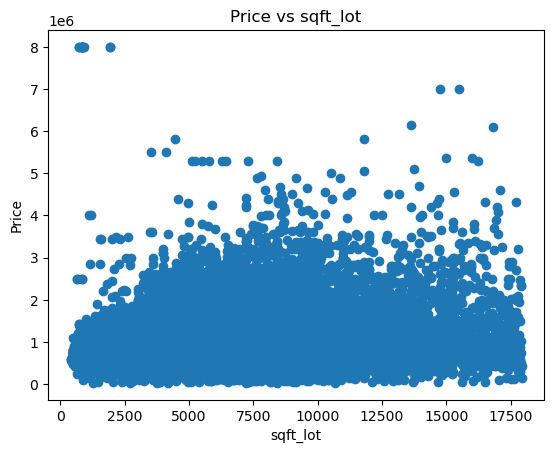

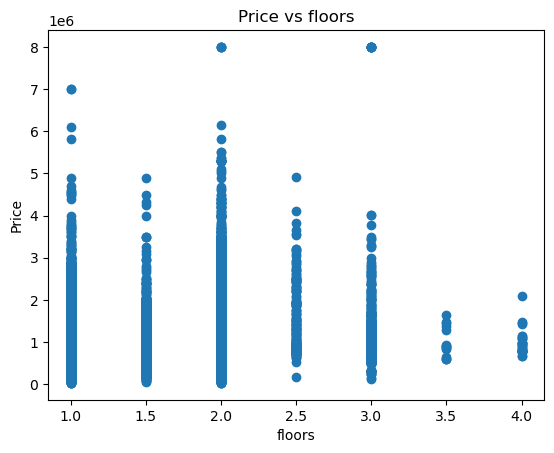

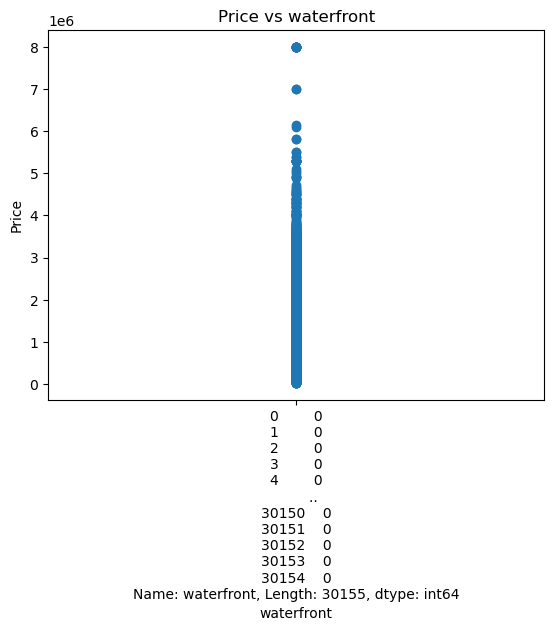

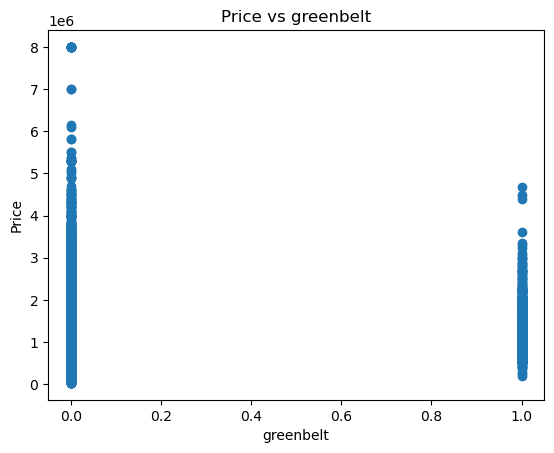

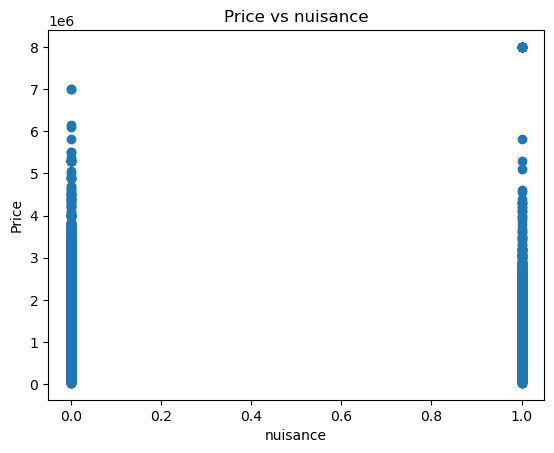

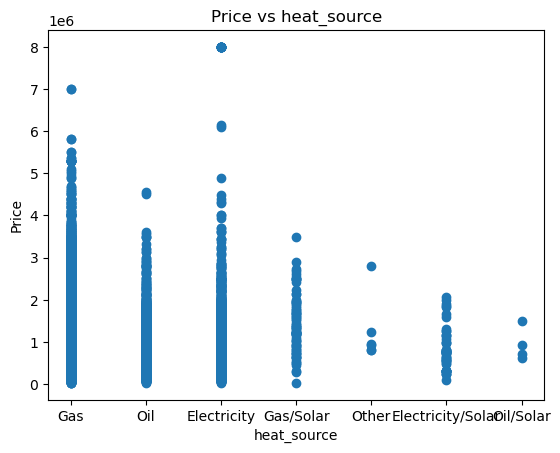

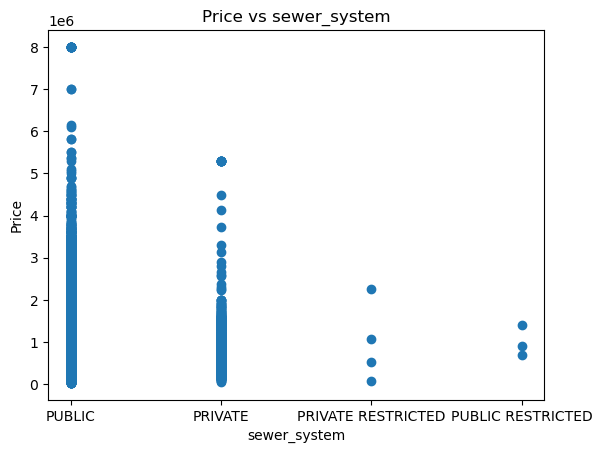

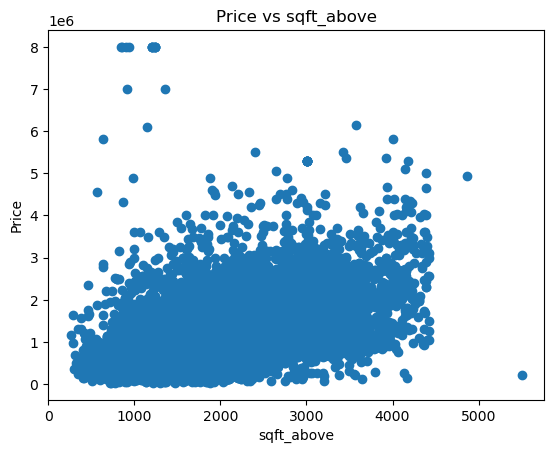

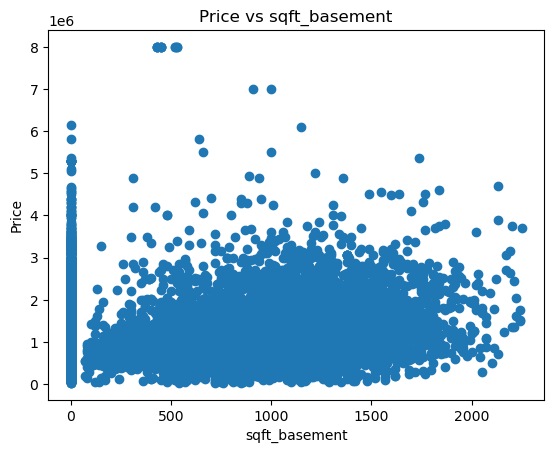

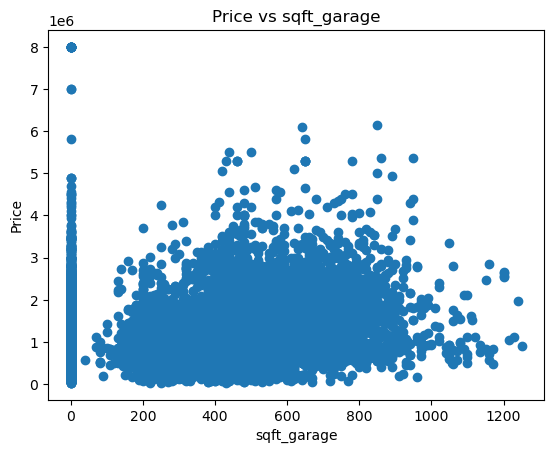

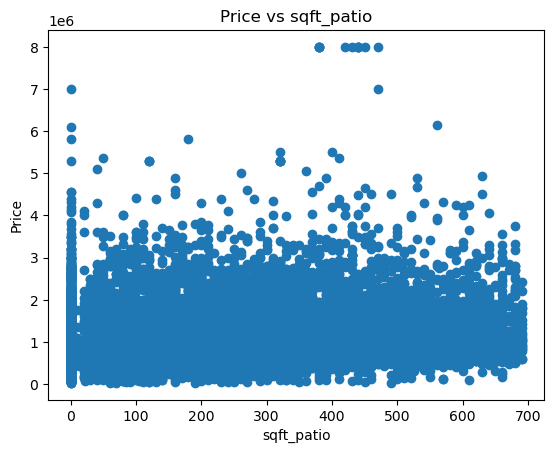

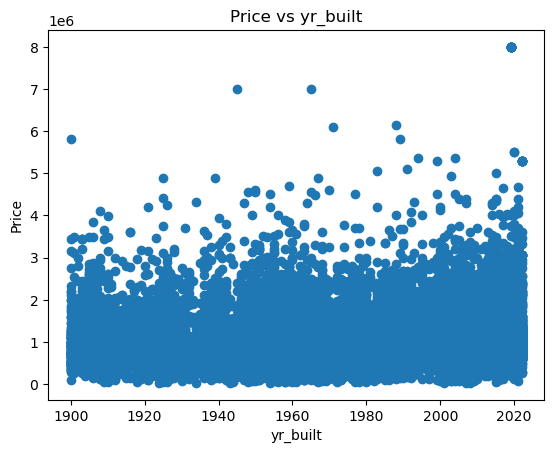

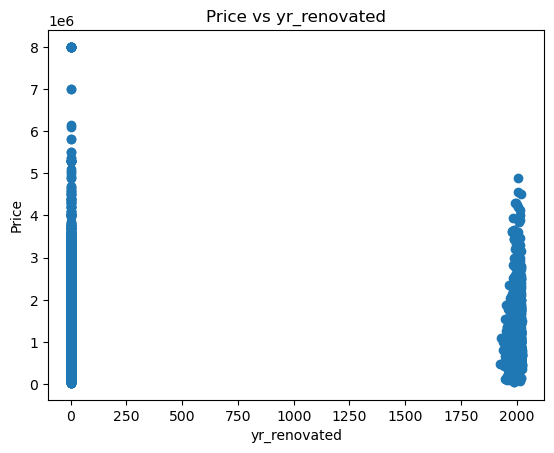

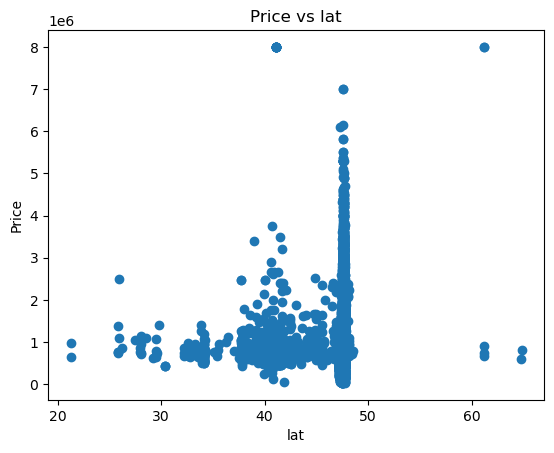

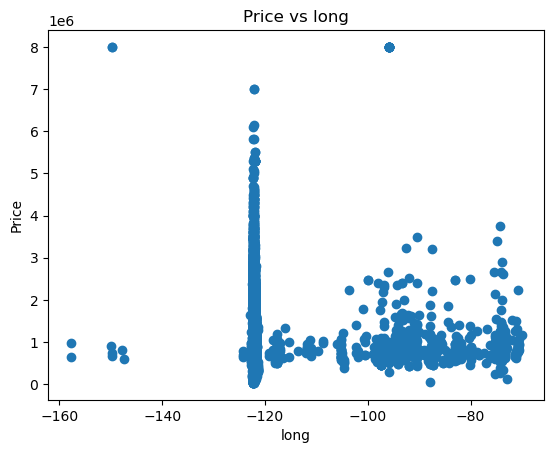

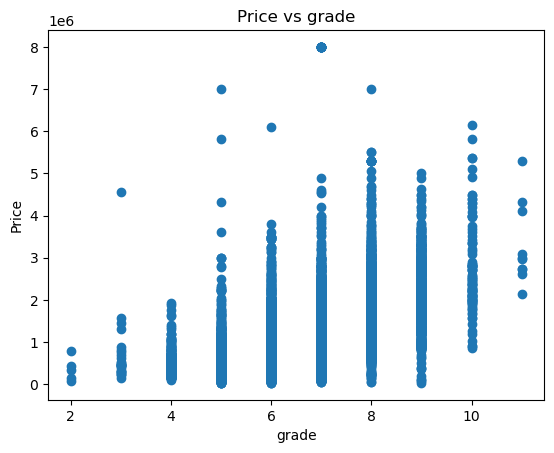

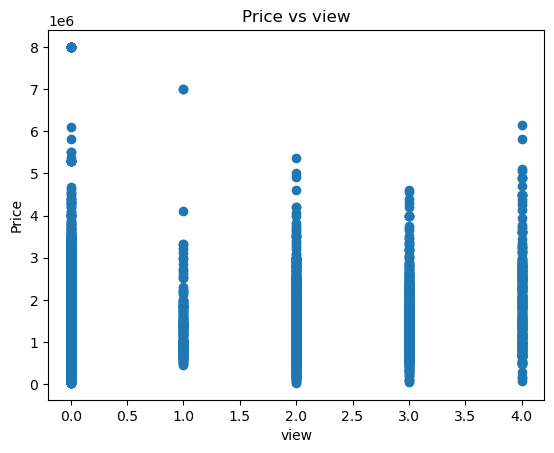

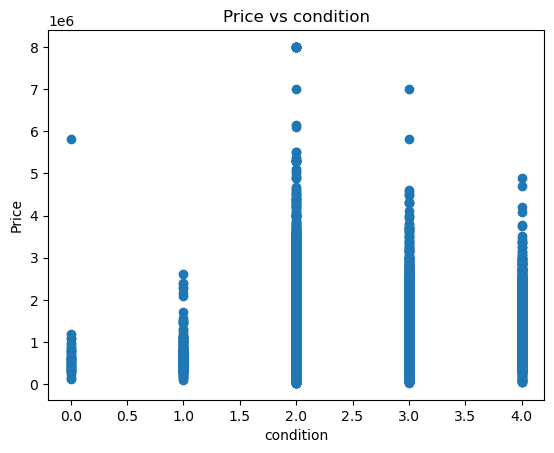

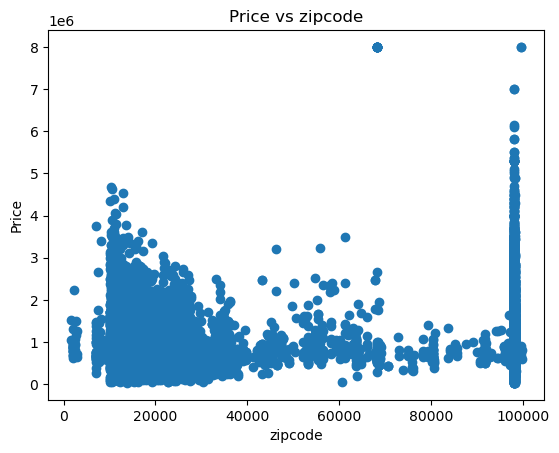

In [149]:
# get list of column names
columns = list(filtered_df.columns)

# remove columns that are not independent variables
exclude = ['id', 'date', 'price', 'address']
columns = [col for col in columns if col not in exclude]

# loop over columns and create scatter plot with price
for col in columns:
    plt.scatter(filtered_df[col], filtered_df['price'])
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [162]:
X = filtered_df.drop(columns=['price', 'id', 'waterfront'])
y = filtered_df['price']
cols_to_drop = X.select_dtypes(include=['object']).columns
X = X.drop(columns=cols_to_drop)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=33)

In [163]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns, index=X_train.index)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns, index=X_test.index)

In [164]:
model_sk_x = LinearRegression()
model_sk_x.fit(X_train_scale, y_train)
test_preds_x = model_sk_x.predict(X_train_scale)
r2_score(y_train, test_preds_x)

0.45591588797494964

In [165]:
test_pred_x = model_sk_x.predict(X_test_scale)
r2_score(y_test, test_pred_x)

0.4543841714683017

In [134]:
y = df['price']
X_b = df['sqft_living']
X_b

0        1180
1        2770
2        2880
3        2160
4        1120
         ... 
30105    1910
30106    2020
30107    1620
30108    2570
30109    1200
Name: sqft_living, Length: 30110, dtype: int64

In [135]:
ord_cat_select = ['grade', 'heat_source', ]
subset = df[ord_cat_select]
subset

,grade,heat_source
0,6.0,Gas
1,6.0,Oil
2,6.0,Gas
3,8.0,Gas
4,6.0,Electricity
...,...,...
30105,7.0,Oil
30106,6.0,Gas
30107,6.0,Gas
30108,7.0,Gas


In [136]:
b_model = sm.OLS(y, sm.add_constant(X_b))
b_results = b_model.fit()

In [137]:
b_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:22:27   Log-Likelihood:            -4.4845e+05
No. Observations:               30110   AIC:                         8.969e+05
Df Residuals:                   30108   BIC:                         8.969e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.554e+04   9798.938     -7.709      0.000   -9.47e+04   -5.63e+04
sqft_living   560.4787      4.212    133.083      0.000     552.224     568.733
==============================================================================
Omnibus:                    43384.896   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47191364.764
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.252   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
b_abs_error = mean_absolute_error(y, b_results.predict(sm.add_constant(X_b)))
b_abs_error

396253.8351884113

In [139]:
r_adj =  b_results.rsquared_adj
r_adj

0.37035540040693804

In [140]:
# categorical_features = df.select_dtypes("object").columns
# fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

# for index, feature in enumerate(categorical_features):
#     df.groupby(feature).mean().plot.bar(
#         y="price", ax=axes[index]);

In [141]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,grade,view,condition,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0 0\n1 0\n2 0\n3 0...,0,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,6.0,0.0,3.0,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0 0\n1 0\n2 0\n3 0...,0,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,6.0,2.0,2.0,11231
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0 0\n1 0\n2 0\n3 0...,0,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,6.0,2.0,2.0,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0 0\n1 0\n2 0\n3 0...,0,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,8.0,2.0,2.0,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0 0\n1 0\n2 0\n3 0...,0,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,6.0,0.0,2.0,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,0 0\n1 0\n2 0\n3 0...,0,...,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,7.0,0.0,3.0,98103
30106,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,0 0\n1 0\n2 0\n3 0...,0,...,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,6.0,1.0,2.0,98116
30107,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,0 0\n1 0\n2 0\n3 0...,0,...,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,6.0,0.0,2.0,98122
30108,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,0 0\n1 0\n2 0\n3 0...,0,...,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,7.0,0.0,2.0,17127


In [142]:
g = 'grade'

In [143]:
X_i = df[['sqft_living', g]]
X_i

,sqft_living,grade
0,1180,6.0
1,2770,6.0
2,2880,6.0
3,2160,8.0
4,1120,6.0
...,...,...
30105,1910,7.0
30106,2020,6.0
30107,1620,6.0
30108,2570,7.0


In [144]:
df['grade'].isna().sum()

0

In [145]:
X_iterated = pd.get_dummies(X_i, columns = [g])
X_iterated

,sqft_living,grade_1.0,grade_2.0,grade_3.0,grade_4.0,grade_5.0,grade_6.0,grade_7.0,grade_8.0,grade_9.0,grade_10.0,grade_11.0,grade_12.0
0,1180,0,0,0,0,0,1,0,0,0,0,0,0
1,2770,0,0,0,0,0,1,0,0,0,0,0,0
2,2880,0,0,0,0,0,1,0,0,0,0,0,0
3,2160,0,0,0,0,0,0,0,1,0,0,0,0
4,1120,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,1910,0,0,0,0,0,0,1,0,0,0,0,0
30106,2020,0,0,0,0,0,1,0,0,0,0,0,0
30107,1620,0,0,0,0,0,1,0,0,0,0,0,0
30108,2570,0,0,0,0,0,0,1,0,0,0,0,0


In [146]:
X_iterated.drop('grade_Substandard', axis=1, inplace=True)
X_iterated

KeyError: "['grade_Substandard'] not found in axis"

In [ ]:
# onehot_enc = OneHotEncoder(drop = 'first', sparse = False)

In [ ]:
# ordinal_cols = ['grade']
# X_ord_trans = onehot_enc.fit_transform(df[ordinal_cols])
# X_ord_trans

In [ ]:
# cols = onehot_enc.get_feature_names_out()
# cols.max()

In [ ]:
# X_nom = pd.DataFrame(X_ord_trans, columns = cols)
# X_nom

In [ ]:
# con_df = pd.concat([X_i, X_nom], axis=1)
# con_df

In [ ]:
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()
iterated_results.summary()

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_iterated, y, test_size=0.40, random_state=33)

In [ ]:
model_sk_x = LinearRegression()
model_sk_x.fit(X_train2, y_train2)
test_preds_x = model_sk_x.predict(X_test2)

In [ ]:
r2_score(y_test2, test_preds_x)

In [ ]:
mean_absolute_error(y_test2, test_preds_x)

In [ ]:
resids = y_test2 - test_preds_x
fig, ax = plt.subplots()
ax.scatter(test_preds_x, resids)
ax.set_xlabel('Sqft Living')
ax.set_ylabel('Residual')
ax.set_title('Residuals and Predictions')

In [ ]:
df.heat_source.unique()

In [ ]:
df.view.unique()

In [ ]:
df.condition.unique()

In [ ]:
df.greenbelt.unique()

In [ ]:
df.sewer_system.unique()

In [ ]:
df['grade'] = df['grade'].astype('category')
df['grade'] = df['grade'].cat.reorder_categories(['Substandard', 'Poor', 'Low', 'Fair', 'Low Average', 'Average', 'Good', 
                                                  'Better', 'Very Good', 'Excellent', 'Luxury', 'Mansion'])
df['grade']

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
n_data = df.drop('yr_renovated', axis=1)
n_data

In [ ]:
#df['grade'] = df['grade'].astype('category')
#df['grade']

In [ ]:
df[df['grade'] == 7]

In [ ]:
df.corr()['zipcode'].sort_values(ascending=True)

In [ ]:
df.describe()

In [ ]:
df = df[df['address'].str.contains("Washington")]
df = df.reset_index(drop=True)

In [ ]:
towns_and_cities = ['Algona',
                    'Auburn',
                    'Beaux Arts Village',
                    'Bellevue', 'Black Diamond',
                    'Bothell', 'Burien', 'Carnation',
                    'Clyde Hill', 'Covington',
                    'Des Moines', 'Duvall',
                    'Enumclaw',
                    'Federal Way',
                    'Hunts Point',
                    'Issaquah',
                    'Kenmore',
                    'Kent',
                    'Kirkland',
                    'Lake Forest Park',
                    'Maple Valley',
                    'Medina',
                    'Mercer Island',
                    'Milton',
                    'Newcastle',
                    'Normandy Park',
                    'North Bend',
                    'Pacific',
                    'Redmond',
                    'Renton',
                    'Sammamish',
                    'SeaTac',
                    'Seattle',
                    'Shoreline',
                    'Skykomish',
                    'Snoqualmie',
                    'Tukwila',
                    'Woodinville',
                    'Yarrow Point']

In [ ]:
df["town_or_city"] = df["address"].apply(lambda x: next((town for town in towns_and_cities if town in x), None))
df["town_or_city"] = df["town_or_city"].astype("category")
df["town_or_city_code"] = df["town_or_city"].cat.codes

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.corr()['price'].sort_values(ascending=False)

In [ ]:
correlation = df.corr()["price"]
columns_to_drop = correlation[abs(correlation) < 0.12].index
df = df.drop(columns_to_drop, axis=1)

In [ ]:
df.corr()['price'].sort_values(ascending=False)

In [ ]:
y = df['price']
X = df['sqft_living']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

In [ ]:
model_preds = model.predict(X)
resids = y - model_preds
fig, ax = plt.subplots()
ax.scatter(model_preds, resids)
ax.set_xlabel('Sqft Living')
ax.set_ylabel('Residual')
ax.set_title('Residuals and Predictions')

In [ ]:
resids.hist(bins=40)

In [ ]:
df.info()

In [ ]:
data = df[['price', 'sqft_living', 'sqft_above']]
data

In [ ]:
data

In [ ]:
data.corr()['price']

In [ ]:
df.corr()['price'].sort_values(ascending=False)

In [ ]:
y = data['price']
X = data['sqft_living']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

In [ ]:
df.info()

In [ ]:
p_mean = df['price'].mean()
p_std = df['price'].std()
p_max = p_mean + p_std
p_min = p_mean - p_std
df = df.loc[(df['price'] > p_min) & (df['price'] < p_max)]
df.info()

In [ ]:
sq_mean = df['sqft_living'].mean()
sq_std = df['sqft_living'].std()
sq_max = sq_mean + sq_std
sq_min = sq_mean - sq_std
df = df.loc[(df['sqft_living'] > sq_min) & (df['sqft_living'] < sq_max)]
df.info()

In [ ]:
data.corr()['price'].sort_values(ascending=False)

In [ ]:
y = data['sqft_above']
X = data['sqft_living']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

In [ ]:
df.corr()['sqft_above'].sort_values(ascending=False)

In [ ]:
y = data['price']
X = data.drop(columns='price')
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

In [ ]:
df

In [ ]:
df['price_per_sqft_live'] = df['price']/df['sqft_living']
df

In [ ]:
df['price_per_sqft_live'].describe()

In [ ]:
mean = df['price_per_sqft_live'].mean()
std = df['price_per_sqft_live'].mean()
min_ = mean - (1.5*std)
max_ = mean + (1.5*std)
df = df.loc[(df['price_per_sqft_live'] > min_) & (df['price_per_sqft_live'] < max_)]
df.info()

In [ ]:
df = df.dropna(subset='town_or_city', axis=0)

In [ ]:
df.info()

In [ ]:
y = df['price']
X = df['price_per_sqft_live']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

In [ ]:
data = df[['price', 'sqft_living', 'sqft_above', 'price_per_sqft_live']]
data

In [ ]:
y = data['price']
X = data['price_per_sqft_live']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df[['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']] = df[['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']].apply(pd.to_numeric, errors='coerce')

In [ ]:
df['price_per_sqft_sum'] = df['price']/df['sqft_living'] + df['sqft_above'] + df['sqft_basement'] + df['sqft_garage'] + df['sqft_patio']

In [ ]:
df

In [ ]:
y = df['price']
X = df['price_per_sqft_sum']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

In [ ]:
df.corr()['price'].sort_values(ascending=False)

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df['year'] = df['date'].str.split('/').str[2]
df['year'] = df['year'].astype(int)
df.info()

In [ ]:
df

In [ ]:
df['year'].unique()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df

In [ ]:
d2 = df.drop('year', axis=1)

In [ ]:
X1 = d2.drop(columns='price')
y1 = d2['price']
drop = X1.select_dtypes(include=['object', 'category']).columns
X1 = X1.drop(columns=drop)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.40, random_state=33)

In [ ]:
df.info()

In [ ]:
X1_train

In [ ]:
scaler1 = StandardScaler()
scaler1.fit(X1_train)
X1_train_scale = scaler1.transform(X1_train)
X1_test_scale = scaler1.transform(X1_test)
X1_train_scale = pd.DataFrame(X1_train_scale, columns=X1_train.columns, index=X1_train.index)
X1_test_scale = pd.DataFrame(X1_test_scale, columns=X1_test.columns, index=X1_test.index)

X1_train_scale

In [ ]:
model_sk1 = LinearRegression()
model_sk1.fit(X1_train_scale, y1_train)

In [ ]:
test_preds1 = model_sk1.predict(X1_train_scale)

In [ ]:
r2_score(y1_train, test_preds1)

In [ ]:
def adj_r_squared(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    return adj_r2

In [ ]:
adj_r_squared(y1_train, test_preds1, 10661, 13)

In [ ]:
dict(zip(X1_train.columns, model_sk1.coef_))

In [ ]:
mean_absolute_error(y1_train, test_preds1)

In [ ]:
X2 = d2['price_per_sqft_live']
y2 = d2['price']
#drop = X2.select_dtypes(include=['object', 'category']).columns
#X2 = X2.drop(columns=drop)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.40, random_state=33)

In [ ]:
scaler2 = StandardScaler()
scaler2.fit(X2_train)
X2_train_scale = scaler2.transform(X2_train)
X2_test_scale = scaler2.transform(X2_test)
X2_train_scale = pd.DataFrame(X2_train_scale, columns=X2_train.columns, index=X2_train.index)
X2_test_scale = pd.DataFrame(X2_test_scale, columns=X2_test.columns, index=X2_test.index)

X2_train_scale

In [ ]:
model_sk2 = LinearRegression()
model_sk2.fit(X2_train_scale, y2_train)

In [ ]:
test_preds2 = model_sk2.predict(X2_train_scale)

In [ ]:
r2_score(y2_train, test_preds2)

In [ ]:
d2.corr()['price'].sort_values(ascending=False)

In [ ]:
d2.sample(1000, random_state=33).plot.scatter(x='price_per_sqft_live', y="price");

In [ ]:
d2.describe()

In [ ]:
d2['price_per_sqft_above_liv'] = d2['price']/d2['sqft_above'] + d2['sqft_living']
d2

In [ ]:
d2.corr()['price'].sort_values(ascending=False)

In [ ]:
d2.sample(1000, random_state=33).plot.scatter(x='price_per_sqft_above_liv', y="price");

In [ ]:
y_1 = d2['price']
X_1 = d2['price_per_sqft_above_liv']
X_1 = sm.add_constant(X_1)
model = sm.OLS(y_1, X_1).fit()
model.summary()

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))
sns.heatmap(d2.corr(), annot = True)

In [ ]:
d2.columns

In [ ]:
df['grade'].value_counts()

In [ ]:
y = d2['price']
X_i = d2[['']]